In [1]:
%%html
<style>@font-face{font-family:myFont;src:url(v.ttf)}div.text_cell{font-family:myFont;direction:rtl;text-align:center;}</style>

# «به نام خدا»
## هوش مصنوعی 
## تمرین کامپیوتری شماره چهار
## یادگیری ماشین
### امیرحسین دبیری اقدم - 810098024
### استاد: دکتر فدایی
#####  دانشگاه تهران - پاییز 99
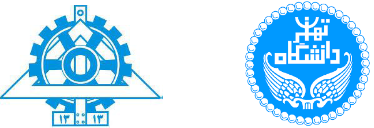
***

###  هدف پروژه  
<p dir="rtl" style="text-align: right;">هدف این پروژه آشنایی با چند روش یادگیری ماشین با کمک کتابخانه SciKit-Learn پایتون و نحوه آماده سازی داده ها برای یادگیری و در نهایت تخمین قیمت خانه بر اساس دیتاستی که داشتیم بود.</p>

### مقدمه
<p dir="rtl" style="text-align: right;">پروژه ما در 4 فاز بود که در فاز صفر به بررسی داده ها و شناخت بیشتر داده ها بود در فار اول به preprocess داده ها پرداختیم و در فازهای بعد با استفاده از چند regressor و به صورت تکی و گروهی قیمت داده ها را تخمین زدیم.</p>
<p dir="rtl" style="text-align: right;">دیتاست مربوط به House Prices سایت Kaggle بود که شامل حدود 80 ویژگی مختلف خانه ها و قیمت آنها بود که جزئیات مربوط به هر ویژگی در فایل data_description.txt موجود است.</p>

### پیاده سازی پروژه


<p style="text-align: right;" dir="rtl"><strong> ایمپورت کردن داده ها و کتابخانه های مورد نیاز</strong></p>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('seaborn') # beautiful plots :O

In [3]:
#importing data
train_data = pd.read_csv("train.csv", index_col = 0)
test_data = pd.read_csv("test.csv", index_col = 0)

<p style="text-align: right;" dir="rtl"><strong>فاز صفر: Visualization and EDA</strong></p>


<p style="text-align: right;" dir="rtl"><strong>1.</strong></p>

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<p style="text-align: right;">میبینیم که با استفاده از دستور info میتوان نوع داده هر ستون و تعداد داده گم شده شان را فهمید و با توجه به اینها و اطلاعات دیگری که در مورد آنها داریم در مورد روش هندل کردنشان تصمیم بگیریم؛ مثلا حذف کل ستون یا جایگزینی با میانگین یا میانه یا... که از دستور describe بدست می آید، البته این دستور فقط برای داده های عددی کاربرد دارد و طبیعتا برای داده های categorical میانگین و میانه و چارک اول و دوم و مینیمم و ماکسیمم و... تعریف نمیشود.</p>
<p dir="rtl" style="text-align: right;">همچنین مشاهده میشود که اکثر ستونها کامل هستند و یا اندکی داده گم شده دارند. (که آنهایی که عددی اند با میانه یا میانگین جایگزین میکنیم اما در مورد داده های غیر عددی نیاز به بررسی بیشتر داریم تا در موردشان تصمیم بگیریم.)</p>

<p style="text-align: right;" dir="rtl"><strong>2.</strong></p>

In [6]:
train_data.isna().sum() / len(train_data) * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

<p dir="rtl" style="text-align: right;">ستونهای Alley<span>،</span>FireplaceQu<span>،&nbsp;</span>PoolQC<span>، </span>Fence<span>،</span>MiscFeature<span> که از نوع </span>categorical<span>&nbsp; هستند، درصد</span> داده های گم شده شان زیاد است و شاید لازم باشد از خیر بعضی از آنها بگذریم و به کل از مجموعه داده حذف کنیم و یا شاید هم داده های گم شده نباشند و NA<span> به معنای نداشتن آن مشخصه (استخر یا شومینه یا...) باشد پس</span> باید بیشتر بررسی شوند.</p>

<p style="text-align: right;" dir="rtl"><strong>3.</strong></p>

<p dir="rtl" style="text-align: right;">با کمک دستور &nbsp;corr<span>، </span>correlation<span> داده های عددی را محاسبه میکنیم و با کشیدن آن به صورت </span>heatmap<span> ،ویژگیهایی که بیشترین </span>correlation<span> را با قیمت خانه دارند در نظر میگیریم چون این موارد احتمالا بیشترین ارتباط را با قیمت دارند و میتوان از آنها برای تخمین دقیقتر قیمت استفاده کرد.</span></p>

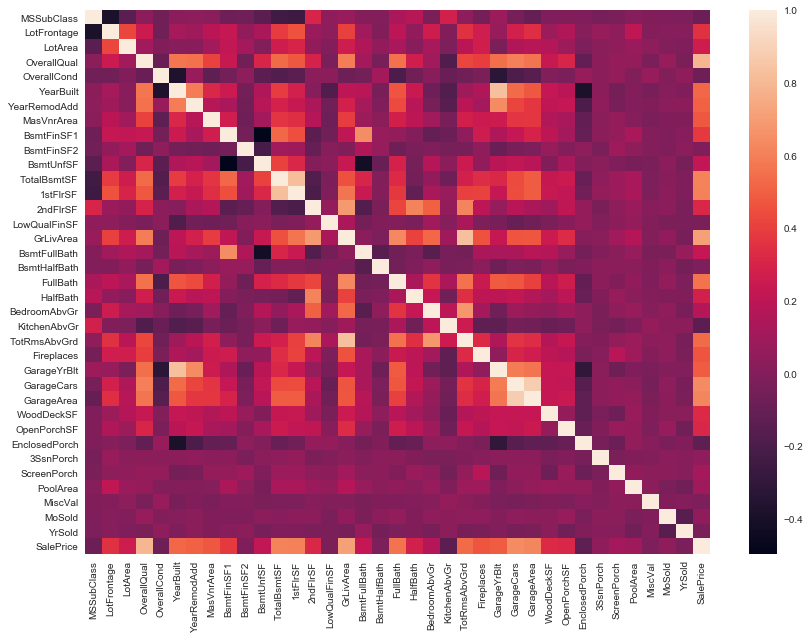

In [7]:
plt.figure(figsize=[14, 10])
sns.heatmap(train_data.corr())

<p dir="rtl" style="text-align: right;">از heatmap نتیجه میگیریم که SalePrice بیشترین correlation را با OverallQual، GrLivArea <span>،</span> GarageArea GarageCars، &nbsp;TotRmsAbvGrd دارد که به ترتیب نشاندهنده کیفیت کلی متریال به کار رفته درخانه، متراژ خانه، متراژ پارکینگ، تعداد ماشین قابل پارک در پارکینگ و تعداد اتاقهاست.</p>
<p dir="rtl" style="text-align: right;">البته با بررسی بیشتر heatmap متوجه میشویم که GarageCars و GarageArea خیلی بهم مرتبط هستند زیرا که تعداد ماشینها با مساحت پارکینگ رابطه مستقیم دارد لذا استفاده از هر دو ویژگی بی مورد است و استفاده فقط از یکی کافی است (مثلا از GarageCars استفاده میکنیم.)</p>

<p dir="rtl" style="text-align: right;">در مورد بقیه ویژگیها نیز از heatmap میتوان به ارتباط برخی دیگر از ویژگیها پی برد مثلا&nbsp; GarageYrBlt و YearBuilt که مربوط به سال ساخت گاراژ و خود خانه است که انتظار هم داریم با هم ارتباط زیادی داشته باشند.</p>

<p style="text-align: right;" dir="rtl"><strong>4.</strong></p>

In [8]:
print("min:", train_data["SalePrice"].min(), " max:", train_data["SalePrice"].max())

min: 34900  max: 755000


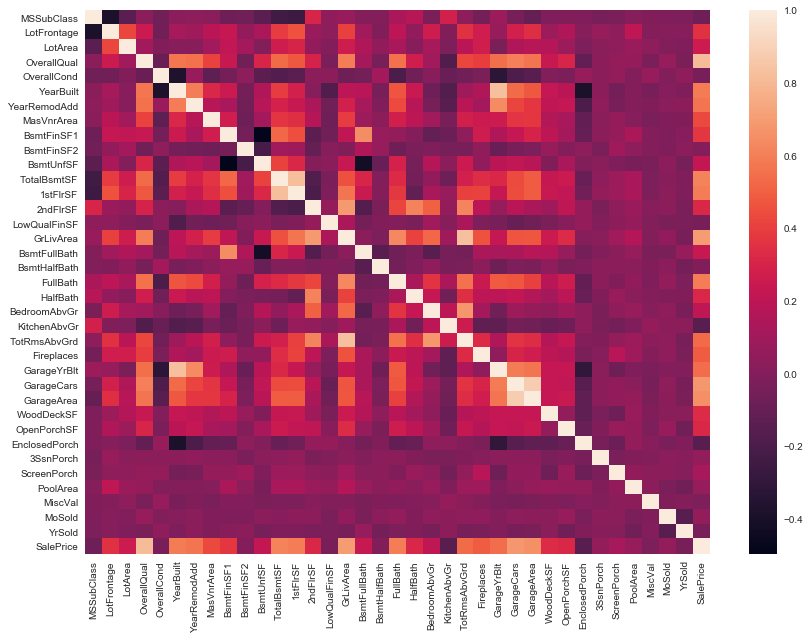

In [9]:
train_data_log = train_data.copy()
train_data_log["SalePrice"] = np.log(train_data_log["SalePrice"])
plt.figure(figsize=[14, 10])
sns.heatmap(train_data_log.corr())

<p dir="rtl" style="text-align: right;">با لگاریتم گرفتن از قیمت خانه ها سطر و ستون مربوط به SalePrice اندکی دچار تغییر میشود زیرا که برخی داده های عددی ما میتوانند به صورت نمایی رشد کنند (مثل قیمت و برخی داده های دیگر که به صورت طبیعی در طبیعت یافت میشود) که لگاریتم گرفتن باعث میشود که به صورت خطی شود و لذا برای تخمین آن به مدل ساده تری نیاز خواهیم داشت پس شاید بهتر باشد که به جای قیمت ها از لگاریتم آنها استفاده کنیم ولی از heatmap فوق میبینیم که خیلی تفاوتی ایجاد نمیکند و لذا نباید انتظار تاثیر زیادی از این کار داشته باشیم. (در فازهای بعدی اثر آن را روی خروجی مدلها بررسی میکنیم و خواهیم دید در بعضی مدلها تاثیر دارد و به بهتر شدن دقت مدل کمک میکند مثل مدل random forest)</p>

<p style="text-align: right;" dir="rtl"><strong>5.</strong></p>

<p dir="rtl" style="text-align: right;">خیر کافی نیست زیرا همانطورکه گفته شد correlation<span> برای داده های عددی تعریف میشود و برای داده های </span>categorical<span> به صورت مستقیم نمیتوان </span>correlation<span> تعریف کرد اما نمیتوان این داده ها را بررسی نکرد و نادیده گرفت زیرا که ممکن است این ویژگی ها یکی از مهمترین معیارها برای قیمت خانه باشد مثلا محله ای که آن خانه در آن واقع است یا وجود استخر یا دیگر ویژگیها (</span>MiscFeature<span>) مثل وجود زمین تنیس یا آسانسور یا... لذا حتما برای آموزش مدل باید این ویژگیها نیز بررسی و مورد استفاده قرار بگیرند که در ادامه آن ها را به طریقی تبدیل به داده های قابل فهم برای کامپیوتر تبدیل میکنیم .</span></p>

<p style="text-align: right;" dir="rtl"><strong>6.</strong></p>

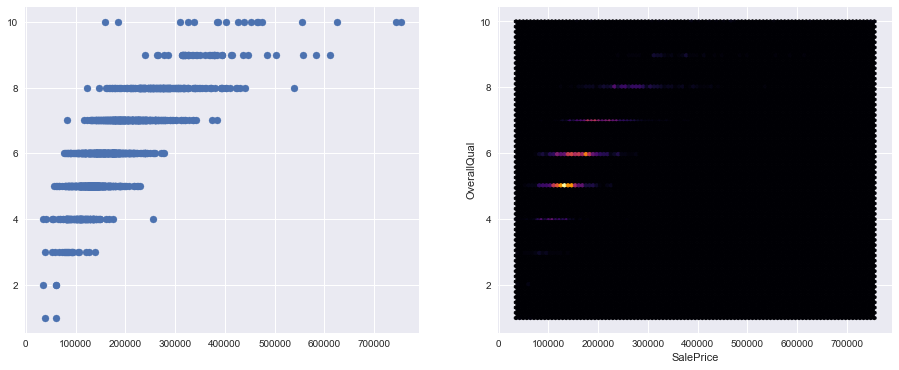

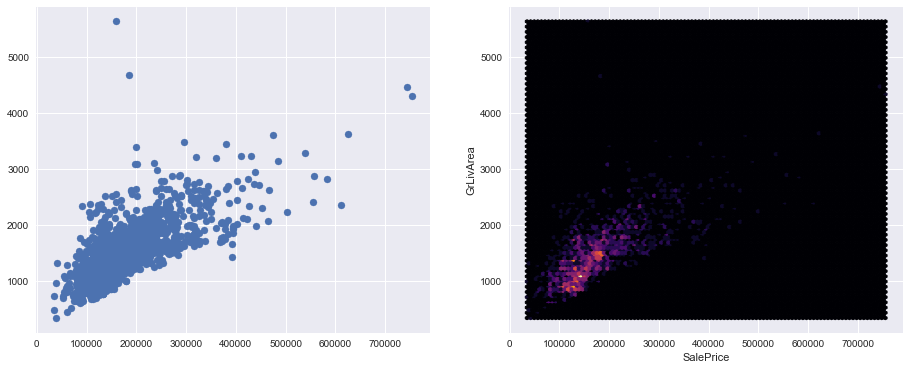

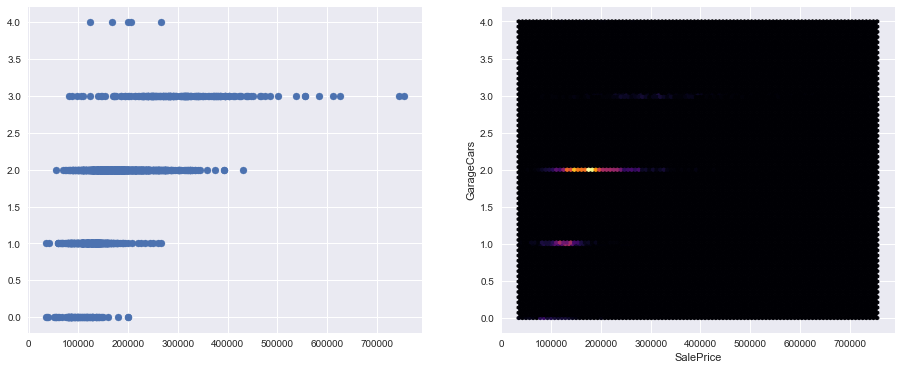

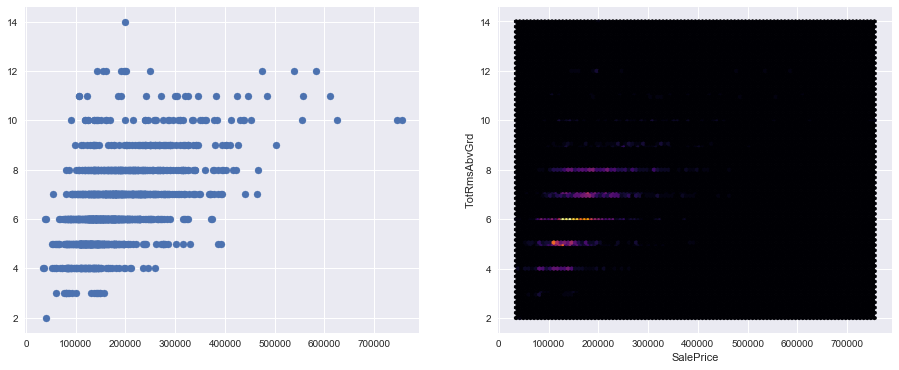

In [10]:
for l in ["OverallQual", "GrLivArea", "GarageCars", "TotRmsAbvGrd"]:
    fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
    ax = axs[0]
    plt.xlabel("SalePrice")
    plt.ylabel(l)
    ax.scatter(train_data["SalePrice"], train_data[l])
    ax = axs[1]
    ax.hexbin(train_data["SalePrice"], train_data[l], cmap='inferno')
    plt.show()

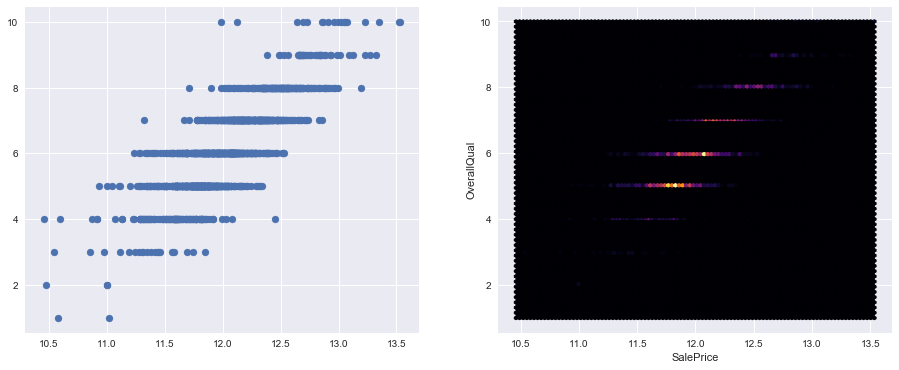

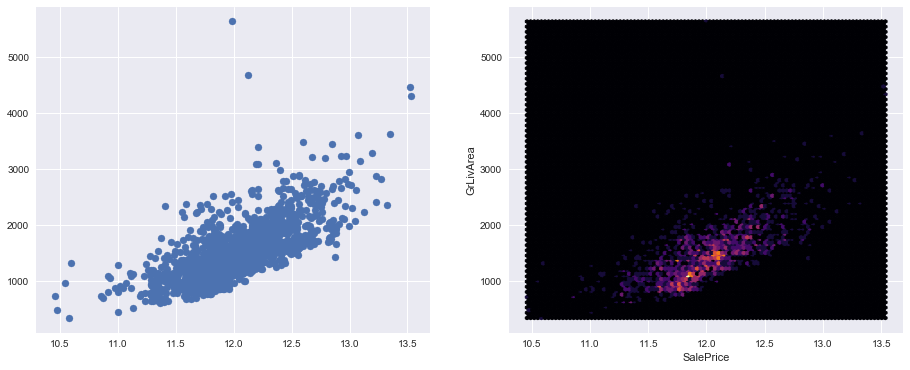

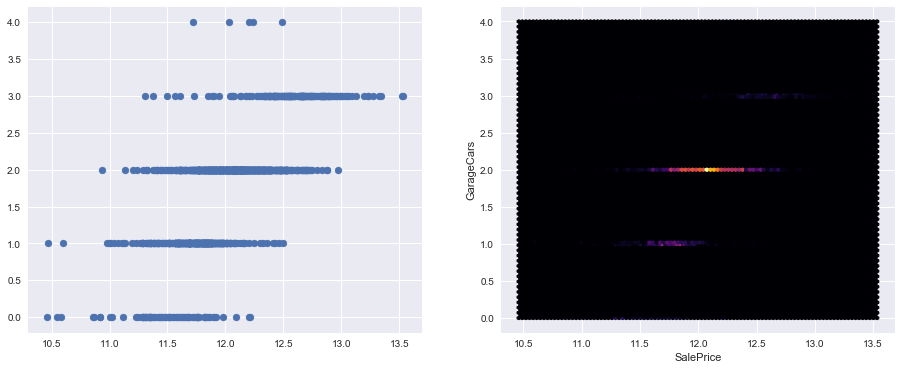

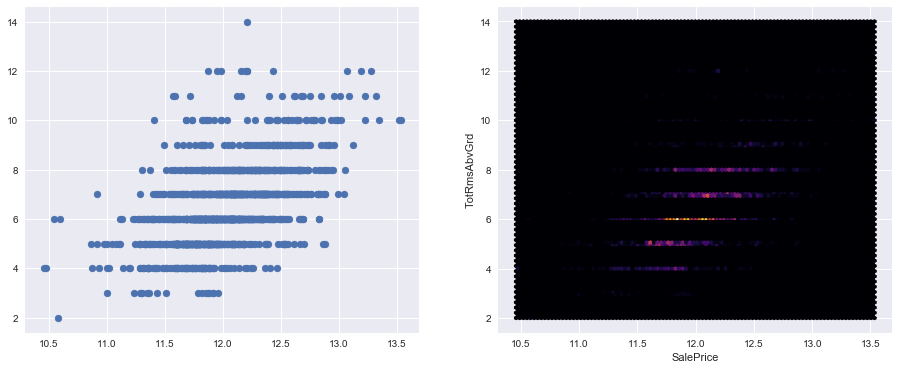

In [11]:
#log
for l in ["OverallQual", "GrLivArea", "GarageCars", "TotRmsAbvGrd"]:
    fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
    ax = axs[0]
    plt.xlabel("SalePrice")
    plt.ylabel(l)
    ax.scatter(train_data_log["SalePrice"], train_data[l])
    ax = axs[1]
    ax.hexbin(train_data_log["SalePrice"], train_data[l], cmap='inferno')
    plt.show()

<p dir="rtl" style="text-align: right;">میبینیم که همانطور که در heatmap <span>هم دیدیم، با هم ارتباط دارند و مثلا در مورد </span>OverallQual میبینیم که هر پلۀ کیفیت چه بازه قیمتی را شامل میشود و تمرکز قیمت در هر پله کجاست. (همین موضوع در مورد GarageCars، TotRmsAbvGrصادق است.)</p>
<p dir="rtl" style="text-align: right;">یا برای مثال قیمت خانه و مساحت آن رابطه تقریبا نمایی دارند و وقتی لگاریتم گرفته شده میبینیم که داده ها حول یک خطی قرار دارند.</p>
<p dir="rtl" style="text-align: right;">همچنین میبینیم که لگاریتم گرفتن ارتباط آنها را خیلی تحت تاثیر قرار نمیدهد و نمودارها شبیه هستند در هر دو حالت اما شاید لگاریتم اندکی بهتر ارتباط را نشان میدهد زیرا پخش شدگی دیتا که ناشی از رشد نمایی قیمت خانه است را تا حدی از بین میبرد و دید بهتری نسبت به ارتباط داده ها میدهد.</p>
<p dir="rtl" style="text-align: right;">&nbsp;مزیت hexbin نسبت scatter این است که تمرکز داده ها و چگالی آنهارا هم نشان میدهد که دید بهتری نسبت به داده ها به ما میدهد.</p>

<p style="text-align: right;" dir="rtl"><strong>7.</strong></p>

<p dir="rtl" style="text-align: right;">برای اینکه دید بهتری نسبت به کل دیتا ست پیدا کنیم نمودار countplot و میانگین قیمت را برای همه داده های دسته ای رسم کرده ایم:</p>

MSZoning
RL 191.0049947871416 k USD
RM 126.31683027522935 k USD
C (all) 74.528 k USD
FV 214.01406153846153 k USD
RH 131.558375 k USD


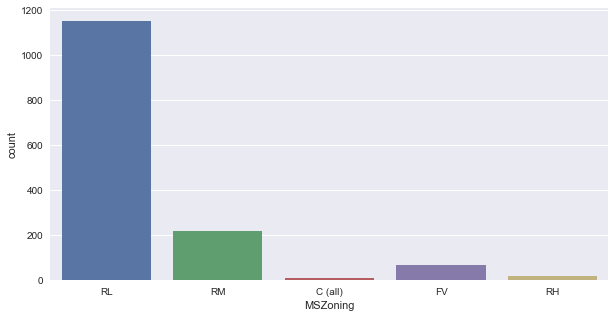

Street
Pave 181.13053851444292 k USD
Grvl 130.1905 k USD


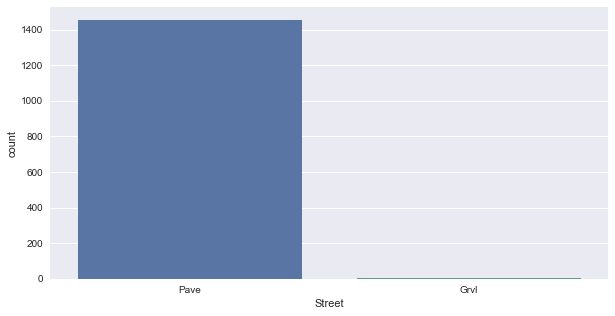

Alley
nan nan k USD
Grvl 122.21908 k USD
Pave 168.00058536585365 k USD


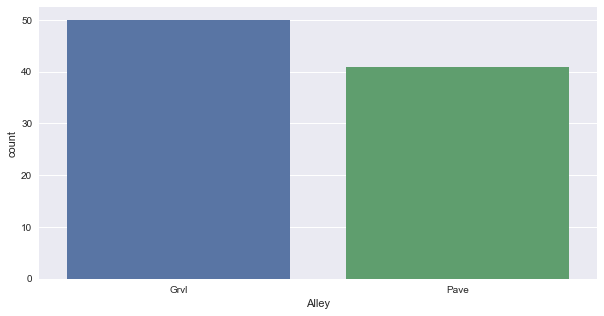

LotShape
Reg 164.7548183783784 k USD
IR1 206.1016652892562 k USD
IR2 239.83336585365853 k USD
IR3 216.0365 k USD


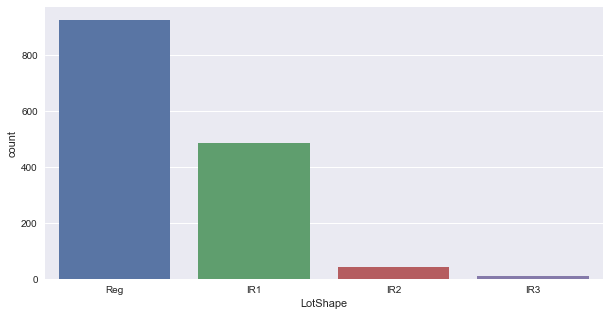

LandContour
Lvl 180.18374675819985 k USD
Bnk 143.10407936507937 k USD
Low 203.66111111111113 k USD
HLS 231.53394 k USD


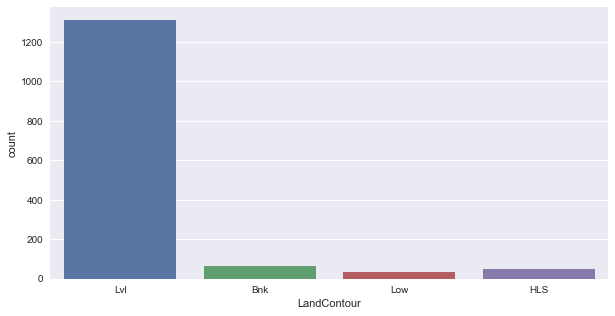

Utilities
AllPub 180.95095681973953 k USD
NoSeWa 137.5 k USD


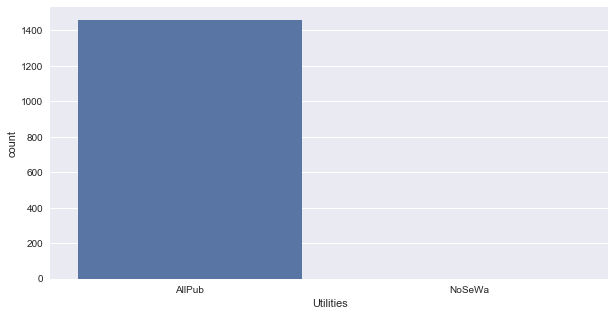

LotConfig
Inside 176.9380475285171 k USD
FR2 177.93457446808512 k USD
Corner 181.62342585551332 k USD
CulDSac 223.8546170212766 k USD
FR3 208.475 k USD


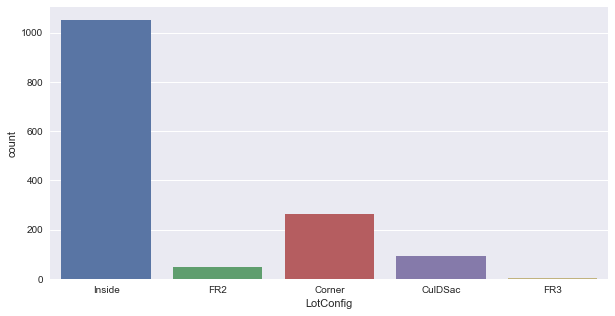

LandSlope
Gtl 179.9567995658466 k USD
Mod 196.73413846153846 k USD
Sev 204.3792307692308 k USD


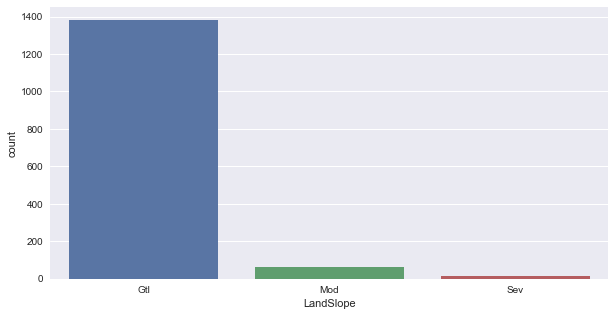

Neighborhood
CollgCr 197.96577333333335 k USD
Veenker 238.77272727272725 k USD
Crawfor 210.62472549019608 k USD
NoRidge 335.29531707317074 k USD
Mitchel 156.27012244897958 k USD
Somerst 225.3798372093023 k USD
NWAmes 189.0500684931507 k USD
OldTown 128.22530088495574 k USD
BrkSide 124.83405172413792 k USD
Sawyer 136.79313513513515 k USD
NridgHt 316.2706233766234 k USD
NAmes 145.84707999999998 k USD
SawyerW 186.5557966101695 k USD
IDOTRR 100.1237837837838 k USD
MeadowV 98.5764705882353 k USD
Edwards 128.2197 k USD
Timber 242.24744736842104 k USD
Gilbert 192.85450632911395 k USD
StoneBr 310.499 k USD
ClearCr 212.56542857142858 k USD
NPkVill 142.69444444444443 k USD
Blmngtn 194.87088235294118 k USD
BrDale 104.49375 k USD
SWISU 142.59135999999998 k USD
Blueste 137.5 k USD


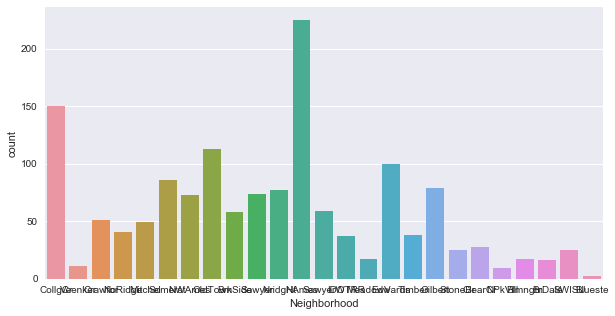

Condition1
Norm 184.49549206349207 k USD
Feedr 142.4754814814815 k USD
PosN 215.18421052631578 k USD
Artery 135.09166666666667 k USD
RRAe 138.4 k USD
RRNn 212.4 k USD
RRAn 184.3966153846154 k USD
PosA 225.875 k USD
RRNe 190.75 k USD


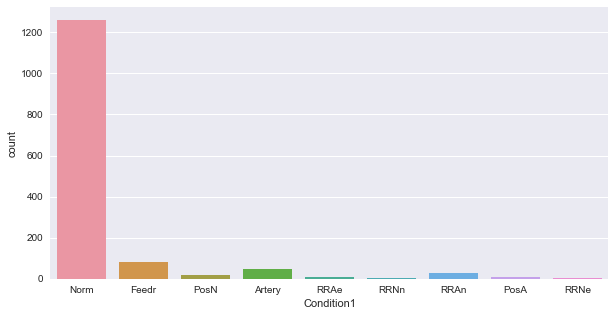

Condition2
Norm 181.16940553633216 k USD
Artery 106.5 k USD
RRNn 96.75 k USD
Feedr 121.16666666666667 k USD
PosN 284.875 k USD
PosA 325.0 k USD
RRAn 136.905 k USD
RRAe 190.0 k USD


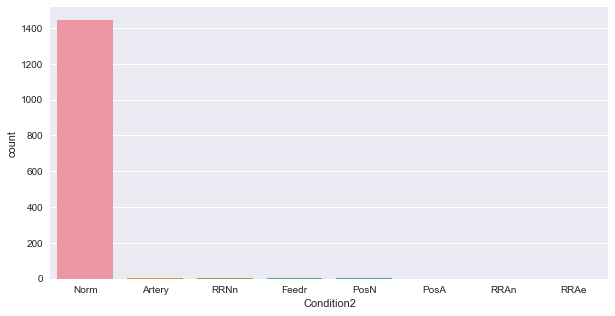

BldgType
1Fam 185.76380737704918 k USD
2fmCon 128.43225806451613 k USD
Duplex 133.54107692307693 k USD
TwnhsE 181.95934210526315 k USD
Twnhs 135.91162790697675 k USD


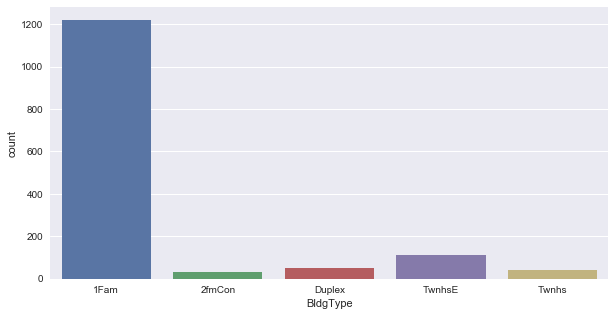

HouseStyle
2Story 210.0517640449438 k USD
1Story 175.9854779614325 k USD
1.5Fin 143.11674025974028 k USD
1.5Unf 110.15 k USD
SFoyer 135.07448648648648 k USD
SLvl 166.70338461538464 k USD
2.5Unf 157.35454545454544 k USD
2.5Fin 220.0 k USD


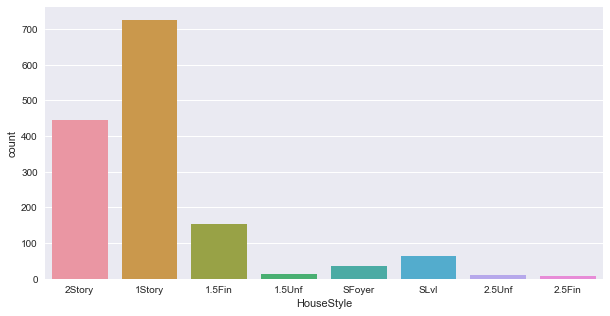

RoofStyle
Gable 171.48395617879055 k USD
Hip 218.87693356643356 k USD
Gambrel 148.9090909090909 k USD
Mansard 180.56842857142857 k USD
Flat 194.69 k USD
Shed 225.0 k USD


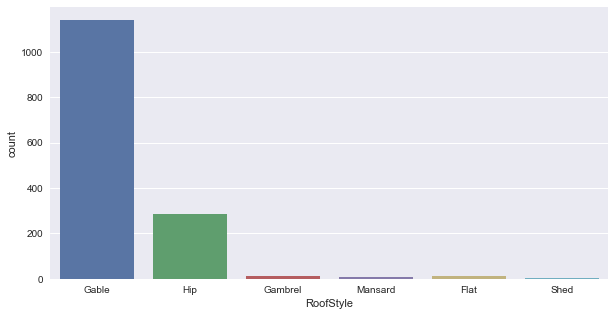

RoofMatl
CompShg 179.80367921896791 k USD
WdShngl 390.25 k USD
Metal 180.0 k USD
WdShake 241.4 k USD
Membran 241.5 k USD
Tar&Grv 185.40636363636364 k USD
Roll 137.0 k USD
ClyTile 160.0 k USD


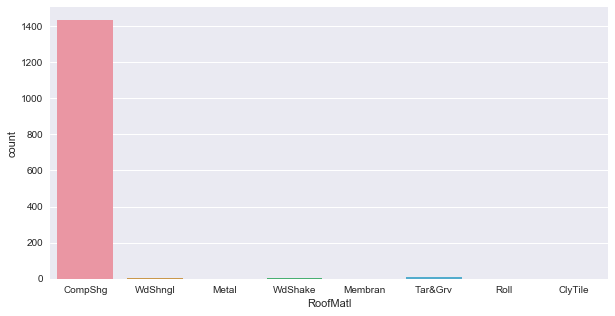

Exterior1st
VinylSd 213.73290097087377 k USD
MetalSd 149.42217727272728 k USD
Wd Sdng 149.84164563106796 k USD
HdBoard 163.07745045045044 k USD
BrkFace 194.573 k USD
WdShing 150.65507692307693 k USD
CemntBd 231.69065573770493 k USD
Plywood 175.94237962962964 k USD
AsbShng 107.38555000000001 k USD
Stucco 162.99 k USD
BrkComm 71.0 k USD
AsphShn 100.0 k USD
Stone 258.5 k USD
ImStucc 262.0 k USD
CBlock 105.0 k USD


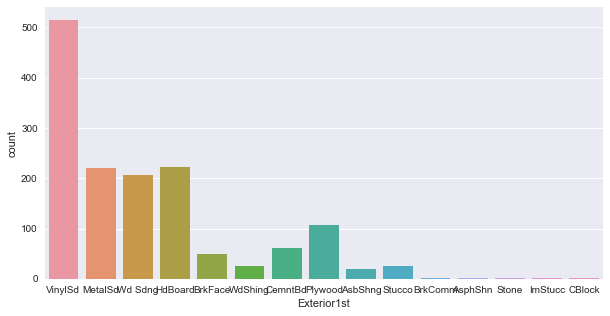

Exterior2nd
VinylSd 214.4324603174603 k USD
MetalSd 149.80317289719625 k USD
Wd Shng 161.32894736842104 k USD
HdBoard 167.66156521739128 k USD
Plywood 168.11238732394366 k USD
Wd Sdng 148.3860659898477 k USD
CmentBd 230.09383333333335 k USD
BrkFace 195.818 k USD
Stucco 155.90515384615384 k USD
AsbShng 114.06055 k USD
Brk Cmn 126.71428571428571 k USD
ImStucc 252.07 k USD
AsphShn 138.0 k USD
Stone 158.2248 k USD
Other 319.0 k USD
CBlock 105.0 k USD


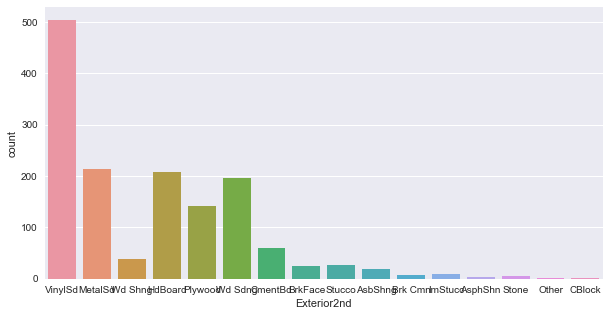

MasVnrType
BrkFace 204.69187191011235 k USD
None 156.2218912037037 k USD
Stone 265.583625 k USD
BrkCmn 146.31806666666668 k USD
nan nan k USD


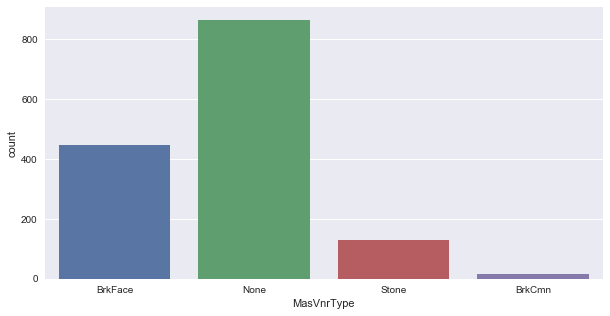

ExterQual
Gd 231.63351024590165 k USD
TA 144.34131346578366 k USD
Ex 367.36096153846154 k USD
Fa 87.98521428571429 k USD


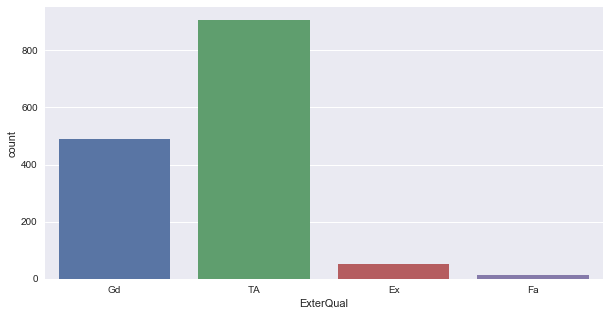

ExterCond
TA 184.03489625585024 k USD
Gd 168.8975684931507 k USD
Fa 102.59514285714286 k USD
Po 76.5 k USD
Ex 201.33333333333334 k USD


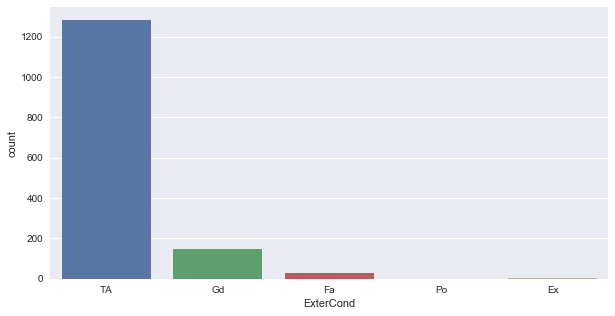

Foundation
PConc 225.23044204018547 k USD
CBlock 149.805714511041 k USD
BrkTil 132.29107534246575 k USD
Wood 185.66666666666666 k USD
Slab 107.365625 k USD
Stone 165.95916666666665 k USD


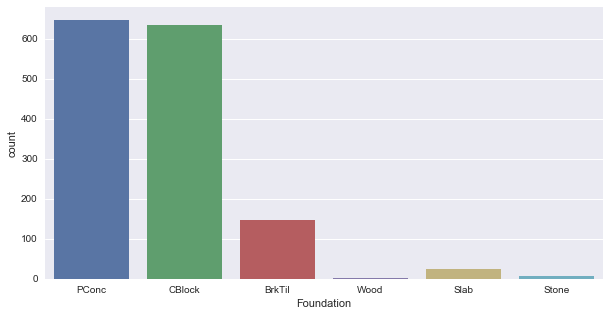

BsmtQual
Gd 202.6884789644013 k USD
TA 140.7598181818182 k USD
Ex 327.0410413223141 k USD
nan nan k USD
Fa 115.69202857142857 k USD


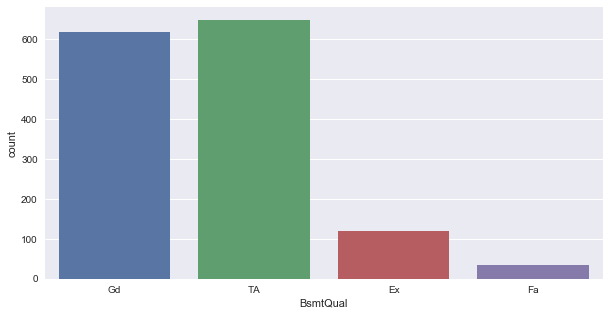

BsmtCond
TA 183.6326209000763 k USD
Gd 213.59990769230768 k USD
nan nan k USD
Fa 121.80953333333333 k USD
Po 64.0 k USD


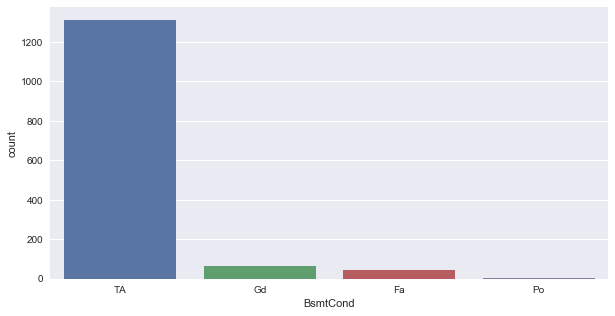

BsmtExposure
No 165.65229590766 k USD
Gd 257.6898059701493 k USD
Mn 192.78965789473685 k USD
Av 206.64342081447964 k USD
nan nan k USD


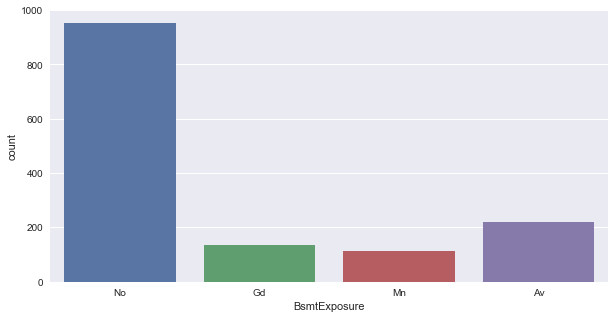

BsmtFinType1
GLQ 235.41372009569378 k USD
ALQ 161.57306818181817 k USD
Unf 170.67057674418606 k USD
Rec 146.88924812030075 k USD
BLQ 149.4936554054054 k USD
nan nan k USD
LwQ 151.8527027027027 k USD


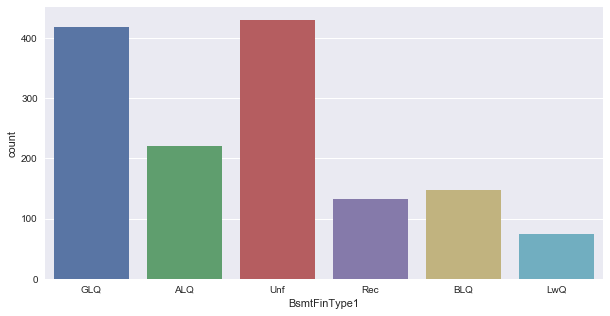

BsmtFinType2
Unf 184.69469028662422 k USD
BLQ 151.101 k USD
nan nan k USD
ALQ 209.94210526315788 k USD
Rec 164.91712962962964 k USD
LwQ 164.36413043478262 k USD
GLQ 180.98214285714286 k USD


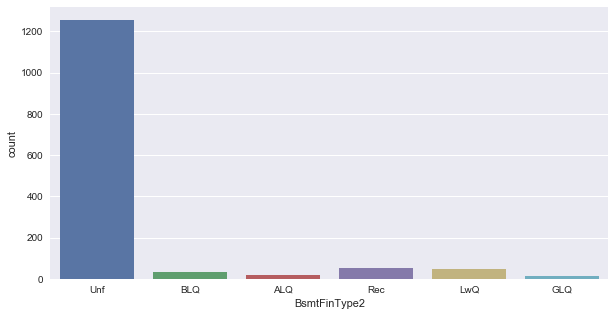

Heating
GasA 182.02119537815125 k USD
GasW 166.63216666666665 k USD
Grav 75.27142857142857 k USD
Wall 92.1 k USD
OthW 125.75 k USD
Floor 72.5 k USD


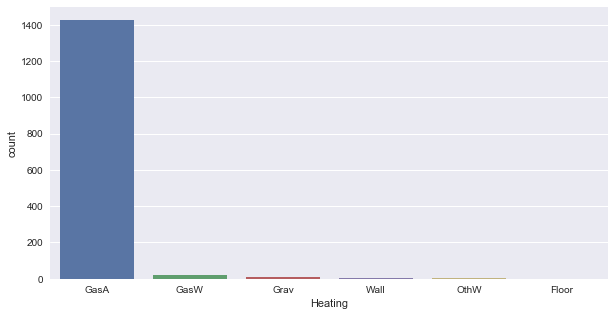

HeatingQC
Ex 214.91442914979757 k USD
Gd 156.8588713692946 k USD
TA 142.3628761682243 k USD
Fa 123.91948979591837 k USD
Po 87.0 k USD


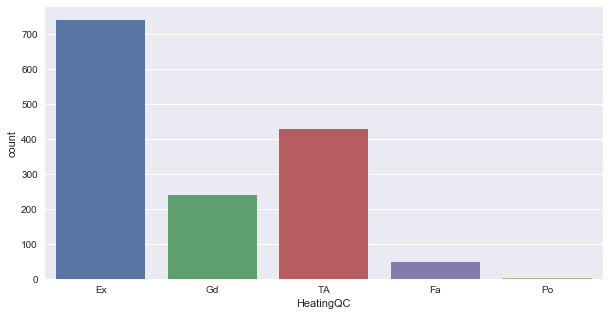

CentralAir
Y 186.18670989010988 k USD
N 105.26407368421053 k USD


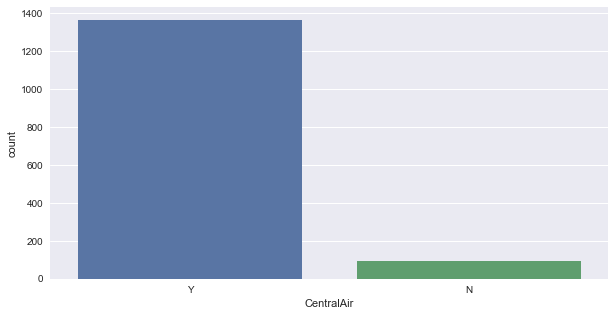

Electrical
SBrkr 186.8251131934033 k USD
FuseF 107.67544444444444 k USD
FuseA 122.19689361702129 k USD
FuseP 97.33333333333333 k USD
Mix 67.0 k USD
nan nan k USD


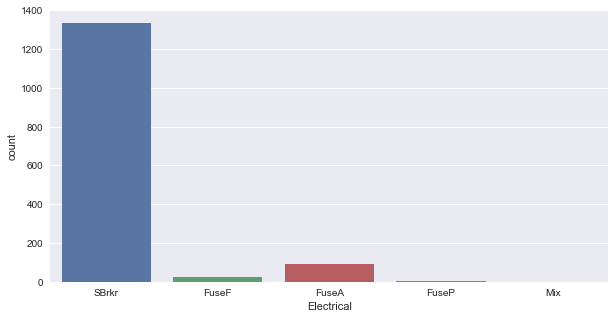

KitchenQual
Gd 212.11602389078496 k USD
TA 139.96251156462586 k USD
Ex 328.55467 k USD
Fa 105.56520512820512 k USD


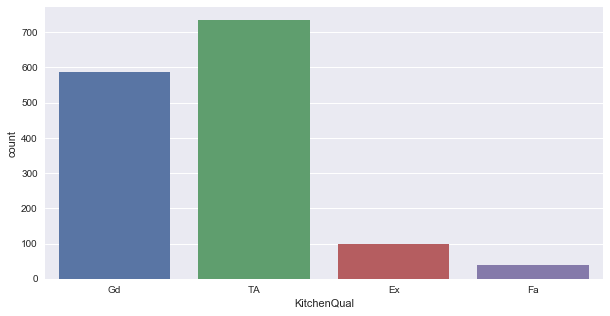

Functional
Typ 183.42914705882353 k USD
Min1 146.38548387096773 k USD
Maj1 153.94814285714287 k USD
Min2 144.24064705882353 k USD
Mod 168.39333333333335 k USD
Maj2 85.8 k USD
Sev 129.0 k USD


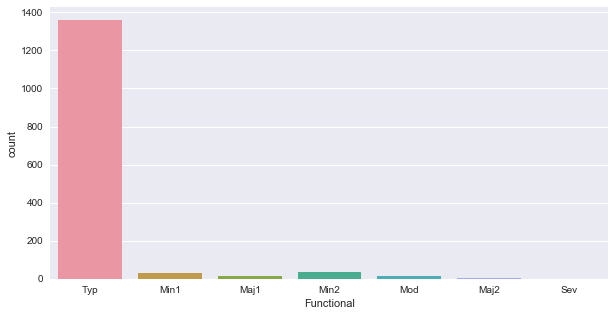

FireplaceQu
nan nan k USD
TA 205.72348881789136 k USD
Gd 226.3514157894737 k USD
Fa 167.29848484848486 k USD
Ex 337.7125 k USD
Po 129.76415 k USD


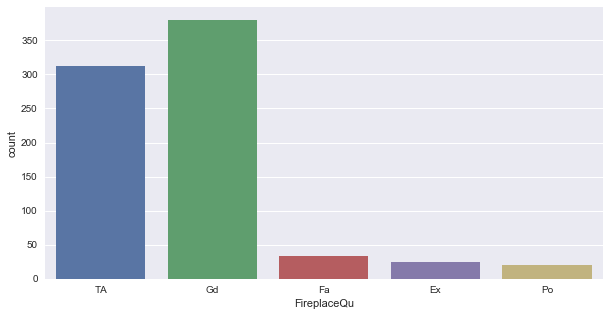

GarageType
Attchd 202.89265632183907 k USD
Detchd 134.09116279069767 k USD
BuiltIn 254.75173863636365 k USD
CarPort 109.96211111111111 k USD
nan nan k USD
Basment 160.5706842105263 k USD
2Types 151.28333333333333 k USD


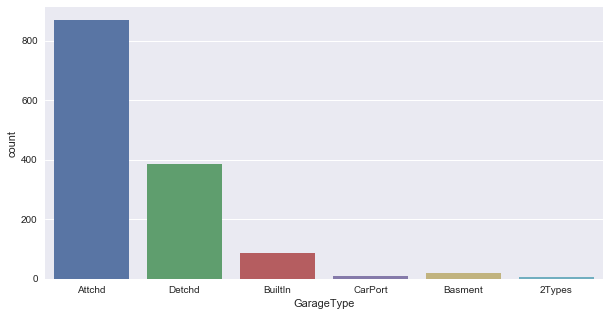

GarageFinish
RFn 202.06886966824646 k USD
Unf 142.15642314049586 k USD
Fin 240.0526903409091 k USD
nan nan k USD


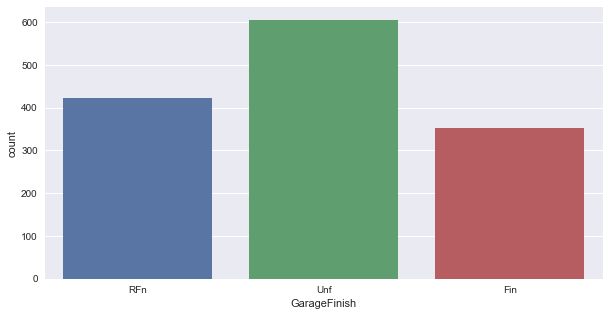

GarageQual
TA 187.48983600305112 k USD
Fa 123.57335416666668 k USD
Gd 215.8607142857143 k USD
nan nan k USD
Ex 241.0 k USD
Po 100.16666666666667 k USD


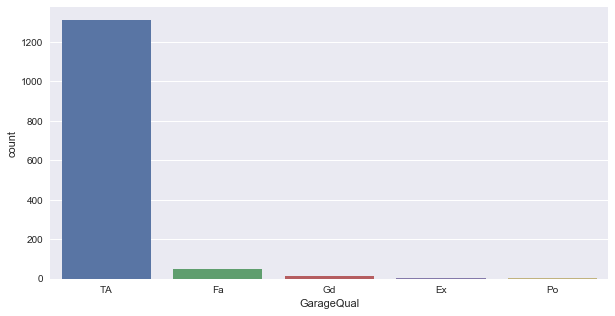

GarageCond
TA 187.88573529411764 k USD
Fa 114.65402857142857 k USD
nan nan k USD
Gd 179.93 k USD
Po 108.5 k USD
Ex 124.0 k USD


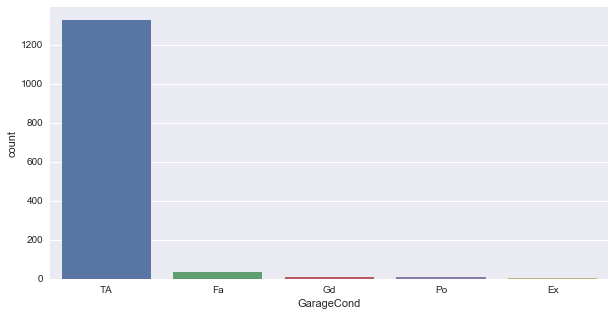

PavedDrive
Y 186.43397388059702 k USD
N 115.03912222222223 k USD
P 132.33 k USD


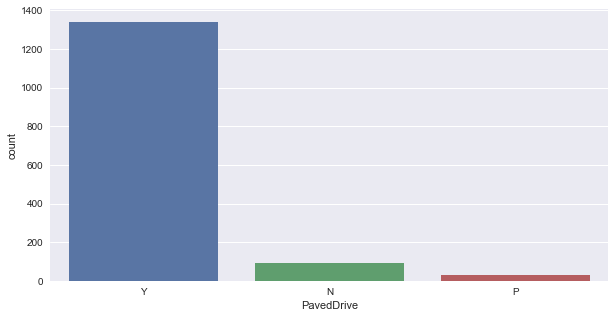

PoolQC
nan nan k USD
Ex 490.0 k USD
Fa 215.5 k USD
Gd 201.99 k USD


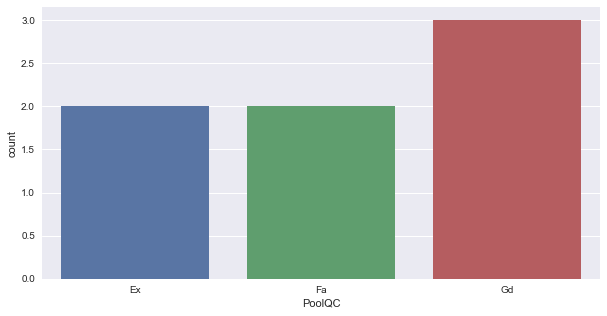

Fence
nan nan k USD
MnPrv 148.7510891719745 k USD
GdWo 140.3793148148148 k USD
GdPrv 178.92745762711866 k USD
MnWw 134.28636363636366 k USD


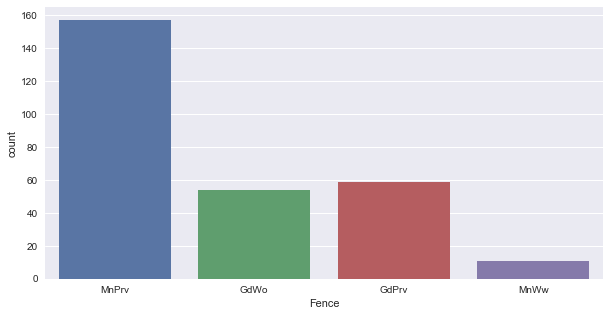

MiscFeature
nan nan k USD
Shed 151.18761224489796 k USD
Gar2 170.75 k USD
Othr 94.0 k USD
TenC 250.0 k USD


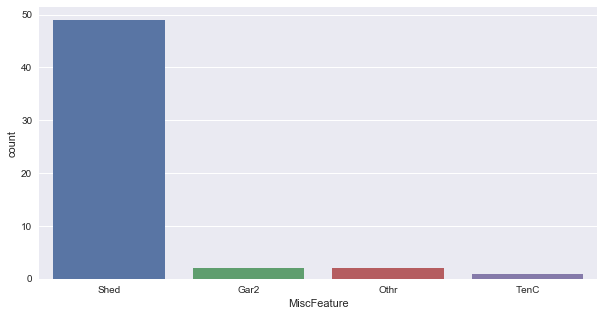

SaleType
WD 173.40183662194158 k USD
New 274.94541803278685 k USD
COD 143.9732558139535 k USD
ConLD 138.78088888888888 k USD
ConLI 200.39 k USD
CWD 210.6 k USD
ConLw 143.7 k USD
Con 269.6 k USD
Oth 119.85 k USD


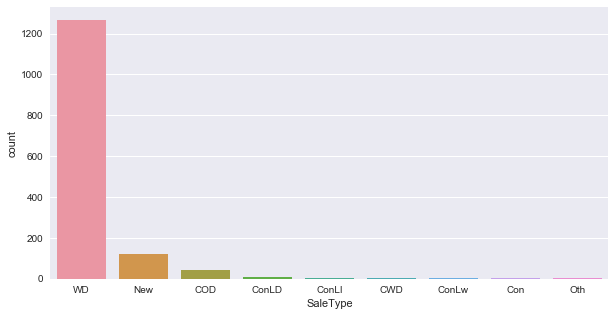

SaleCondition
Normal 175.20221953255427 k USD
Abnorml 146.52662376237623 k USD
Partial 272.291752 k USD
AdjLand 104.125 k USD
Alloca 167.37741666666665 k USD
Family 149.6 k USD


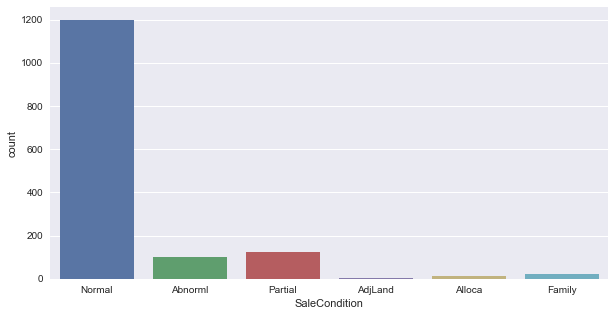

In [12]:
#all categorical datas
for l in train_data.select_dtypes(np.object).columns.unique():
    print(l)
    for value in train_data[l].unique():
        print(value, train_data["SalePrice"][train_data[l] == value].mean() / 1000, "k USD")
    plt.figure(figsize=[10, 5])
    sns.countplot(x=l, data=train_data_log)
    plt.show()

<p dir="rtl" style="text-align: right;">در ادامه با مطالعه فایل داده شده و بررسی نمودارها و میانگین های مذکور با ویژگی های زیر به نظر مناسب بودند:</p>
<p dir="rtl" style="text-align: right;"><span>&nbsp;</span>MSSubClass، MSZoning، Foundation، YrSold، KitchenQual، ExterQual، Neighborhood، GarageType</p>
<p dir="rtl" style="text-align: right;">لذا نمودار countplot و میانگین قیمت برای هر کلاس از این ویژگیها در ادامه دوباره رسم شده است همچنین bar plot را هم برای آنها رسم میکنیم:</p>

MSSubClass
60 239.94850167224078 k USD
20 185.22481156716418 k USD
70 166.77241666666666 k USD
50 143.30297222222222 k USD
190 129.61333333333332 k USD
45 108.59166666666667 k USD
90 133.54107692307693 k USD
120 200.7790804597701 k USD
30 95.82972463768115 k USD
85 147.81 k USD
80 169.73655172413794 k USD
160 138.64738095238096 k USD
75 192.4375 k USD
180 102.3 k USD
40 156.125 k USD


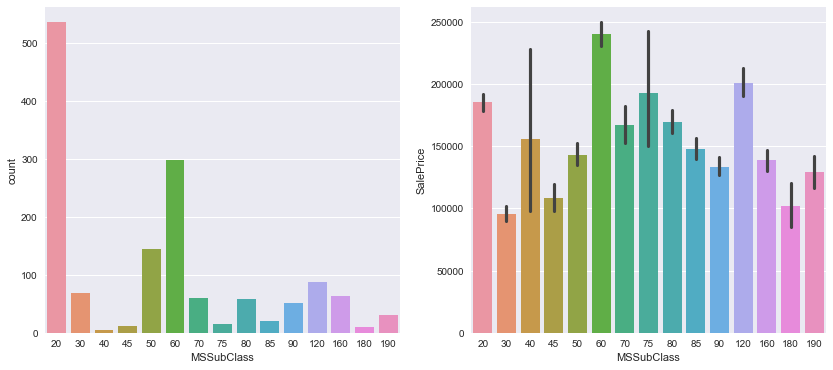

MSZoning
RL 191.0049947871416 k USD
RM 126.31683027522935 k USD
C (all) 74.528 k USD
FV 214.01406153846153 k USD
RH 131.558375 k USD


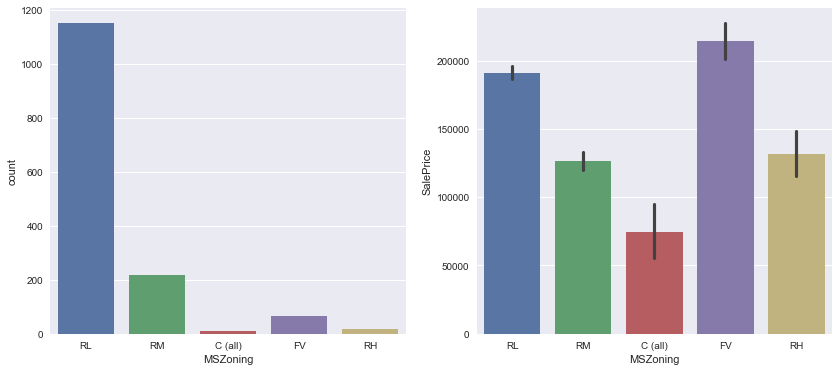

Foundation
PConc 225.23044204018547 k USD
CBlock 149.805714511041 k USD
BrkTil 132.29107534246575 k USD
Wood 185.66666666666666 k USD
Slab 107.365625 k USD
Stone 165.95916666666665 k USD


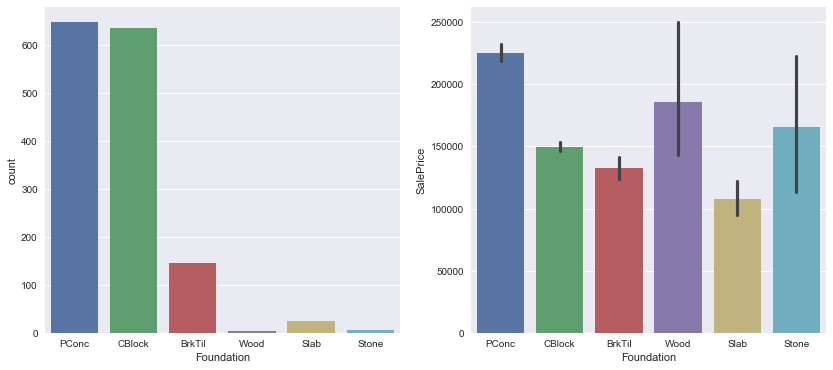

YrSold
2008 177.36083881578946 k USD
2007 186.0631519756839 k USD
2006 182.54945859872612 k USD
2009 179.43210355029586 k USD
2010 177.39367428571427 k USD


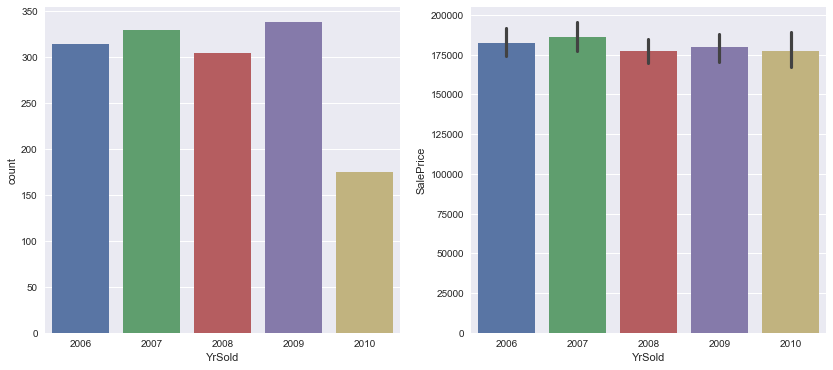

GarageType
Attchd 202.89265632183907 k USD
Detchd 134.09116279069767 k USD
BuiltIn 254.75173863636365 k USD
CarPort 109.96211111111111 k USD
nan nan k USD
Basment 160.5706842105263 k USD
2Types 151.28333333333333 k USD


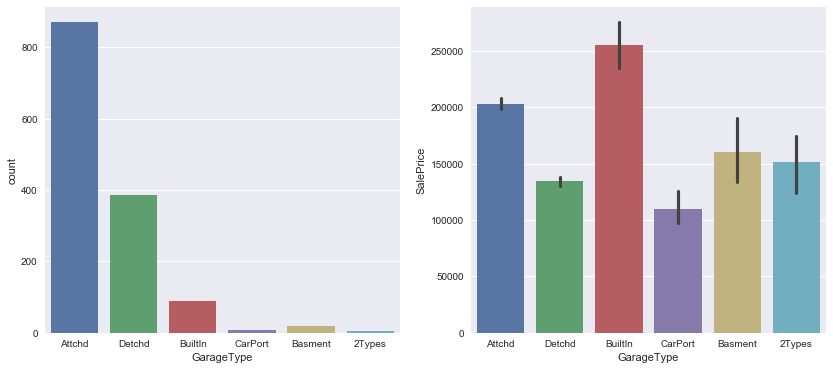

KitchenQual
Gd 212.11602389078496 k USD
TA 139.96251156462586 k USD
Ex 328.55467 k USD
Fa 105.56520512820512 k USD


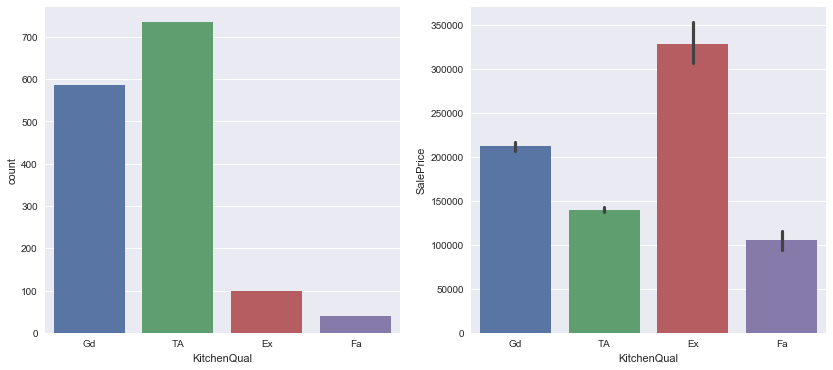

ExterQual
Gd 231.63351024590165 k USD
TA 144.34131346578366 k USD
Ex 367.36096153846154 k USD
Fa 87.98521428571429 k USD


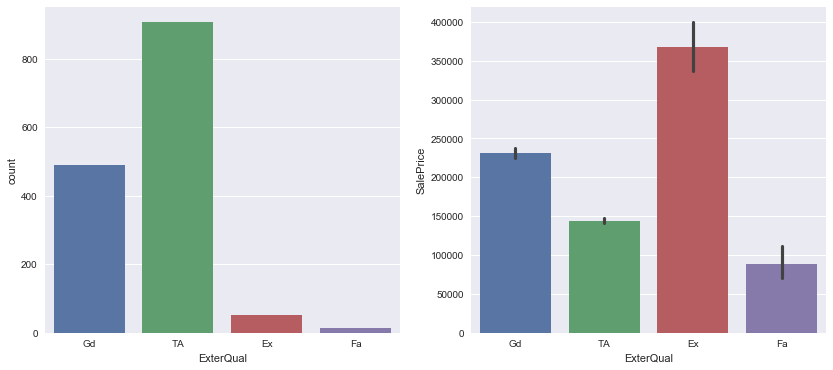

Neighborhood
CollgCr 197.96577333333335 k USD
Veenker 238.77272727272725 k USD
Crawfor 210.62472549019608 k USD
NoRidge 335.29531707317074 k USD
Mitchel 156.27012244897958 k USD
Somerst 225.3798372093023 k USD
NWAmes 189.0500684931507 k USD
OldTown 128.22530088495574 k USD
BrkSide 124.83405172413792 k USD
Sawyer 136.79313513513515 k USD
NridgHt 316.2706233766234 k USD
NAmes 145.84707999999998 k USD
SawyerW 186.5557966101695 k USD
IDOTRR 100.1237837837838 k USD
MeadowV 98.5764705882353 k USD
Edwards 128.2197 k USD
Timber 242.24744736842104 k USD
Gilbert 192.85450632911395 k USD
StoneBr 310.499 k USD
ClearCr 212.56542857142858 k USD
NPkVill 142.69444444444443 k USD
Blmngtn 194.87088235294118 k USD
BrDale 104.49375 k USD
SWISU 142.59135999999998 k USD
Blueste 137.5 k USD


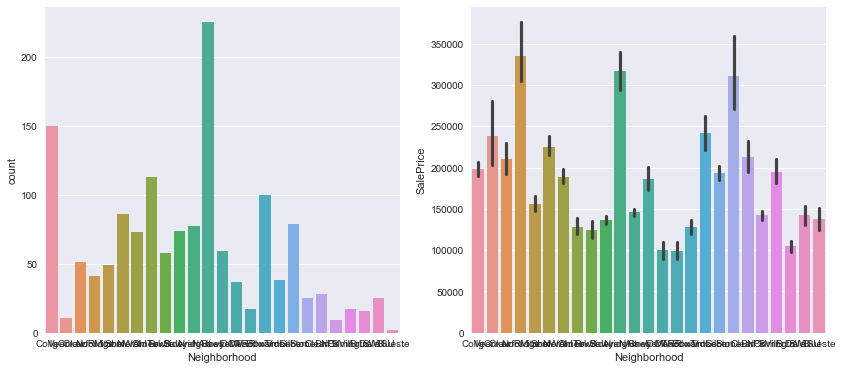

In [13]:
for l in ["MSSubClass","MSZoning", "Foundation", "YrSold", "GarageType", "KitchenQual", "ExterQual", "Neighborhood"]:
    print(l)
    for value in train_data[l].unique():
        print(value, train_data["SalePrice"][train_data[l] == value].mean() / 1000, "k USD")
    fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
    ax=sns.countplot(ax=axs[0],x=l, data=train_data_log)
    ax=sns.barplot(ax=axs[1],x=l, y= train_data["SalePrice"], data=train_data_log)
    plt.show()

<p dir="rtl" style="text-align: right;">درنهایت با توجه به تنوع تعداد کلاس ها و تعداد اعضای کلاس مربوط به فیچرهای Neighborhood ،MSSubClass <span>،</span> KitchenQual، Foundation <span>به نظر نسبت به بقیه مناسبتر هستند برای تخمین قیمت.</span></p>

<p dir="rtl" style="text-align: right;">8.در فازهای بعدی از شناختی که نسبت به این اطلاعات در این بخش پیدا کردیم استفاده میکنیم و برخی از ستونهای غیرضروری را ممکن است حذف کنیم یا تغییراتی در آنها اعمال کنیم.</p>

<p style="text-align: right;" dir="rtl"><strong>فاز اول: Preprocessing</strong></p>


<p style="text-align: right;" dir="rtl"><strong>1.</strong></p>

<p dir="rtl" style="text-align: right;">علاوه بر دو روش گفته شده میتوان به روشهای زیر اشاره کرد:</p>
<p dir="rtl" style="text-align: right;">الف) حذف سطرهایی که داده گم شده دارند. (به جای حذف کل ستون)</p>
<p dir="rtl" style="text-align: right;">ب) تخمین داده های گم شده بوسیله روشهای درونیابی (به جای جایگزینی با میانگین یا ... که البته برای داده های عددی کاربرد دارد)</p>
<p dir="rtl" style="text-align: right;">هرکدام از روشهای فوق با توجه به دیتاها میتواند کاربرد داشته باشد مثلا اگر سطرهایی که داده گم شده دارند زیاد باشند عملا روش حذف سطر غیر قابل استفاده است.</p>
<p dir="rtl" style="text-align: right;">همچنین در برخی داده ها ممکن است استفاده از میانگین مناسب نباشد و به نوعی باعث ایجاد bias شوند(مثلا داده هایی که رشد نمایی دارند یا...) که در این موارد شاید استفاده از روشهای درونیابی مناسبتر باشد که بستگی به داده ها دارد که آیا با هم ارتباطی دارند که بتوان درونیابی انجام داد یا خیر.</p>
<p dir="rtl" style="text-align: right;">در مورد حذف ستون هم که اگر اطلاعات گم شده آن ستون خیلی زیاد باشد حذف کردن آن منطقیست زیرا ویژگی ای که اطلاعات زیادی از آن در دسترس نیست حتی شاید مثل نویز عمل کرده و اثر نامطلوبی روی مدل ما بگذارد.</p>
<p dir="rtl" style="text-align: right;">روشی که در مورد داده های categorical <span>به ذهن میرسد چون امکان میانگین گیری نیست، بررسی کنیم که اکثریت چه نوعی هستند برای داده هایی که گم شده اند هم آن نوع را در نظر بگیریم که البته بستگی به نوع داده شاید شدیدا باعث ایجاد </span>bias شود و باید بررسی شود با توجه به تعداد و پراکندگی داده ها شاید حتی بهتر باشد آن ستون حذف شود.</p>

<p style="text-align: right;" dir="rtl"><strong>2.</strong></p>

<p style="text-align: right;" dir="rtl">همانطور که در فاز صفر دیدیم ویژگیهای Alley،FireplaceQu،&nbsp;PoolQC، Fence،MiscFeature که از نوع categorical&nbsp; هستند، درصد داده های گم شده شان زیاد به نظر می رسید اما با بررسی فایل data_description.txt متوجه می شویم در همه موارد بالا NA <span>لزوما به معنای عدم وجود داده و </span>missing value نیست بلکه میتواند به ترتیب به معنای عدم دسترسی به کوچه،عدم وجود شومینه، عدم وجود استخر، عدم وجود فنس و عدم وجود ویژگیهای دیگر مثل آسانسور یا ... باشد؛ پس بهتر است این ستونها حذف نشوند زیرا شاید به مدل در تخمین بهتر بازه قیمت کمک کند( البته PoolQC به دلیل کم بودن تعداد داده هایش احتمالا کمکی در تخمین نخواهد کرد و لذا در ادامه آن ستون را drop میکنیم)</p>
<p style="text-align: right;" dir="rtl">&nbsp;پس نتیجه ای که میتوان گرفت این است که هر داده ای که به نظر درصد بالایی از داده های گمشده دارد را نباید حذف کرد و باید دقیقتر بررسی کرد ولی اگر به این نتیجه برسیم که واقعا دادههای گم شده زیاد اند بهتر است که حذف شوند زیرا احتمالا کمکی به مدل ما نمیکنند و شاید حتی مثل نویز عملکرد آنرا مخدوش کنند.</p>

<p dir="rtl" style="text-align: right;">در ادامه برای هندل کردن missing valueها، ستونهای GarageYrBlt،MasVnrArea,LotFrontage را با میانه و همچنین یکی از فیچرهای دسته ای که یک سطر گم شده داشت را (Electrical) با حذف آن سطر هندل میکنیم.</p>
<p dir="rtl" style="text-align: right;">در مورد بقیه داده های categorical <span>همانطور که گفتیم </span>NA به معنای داده گم شده نیست و به معنای عدم داشتن آن ویژگی است که نداشتن آن ویژگی را میتوان به عنوان یک کلاس همان ویژگی در نظر گرفت (دسته None) و با این کار train دیتا ما دیگر داده گم شده ای ندارد و تقریبا آماده است که برای یادگیری به مدل داده شود.</p>

In [14]:
train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data["LotFrontage"].median()) #using mean does'nt make any noticable diffrence
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].median()) #using mean does'nt make any noticable diffrence
train_data["GarageYrBlt"] = train_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].median()) #using mean does'nt make any noticable diffrence

train_data_log["LotFrontage"] = train_data["LotFrontage"]
train_data_log["MasVnrArea"] = train_data["MasVnrArea"]
train_data_log["GarageYrBlt"] = train_data["GarageYrBlt"]
train_data = train_data.dropna(subset=['Electrical']) 
train_data_log = train_data_log.dropna(subset=['Electrical'])
train_data = train_data.fillna('None')
train_data_log = train_data_log.fillna('None')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

<p style="text-align: right;" dir="rtl"><strong>3.</strong></p>

<p style="text-align: right;" dir="rtl">Normalization برای تغییر اسکیل داده ها استفاده میشود بطوریکه مقادیر آنها در بازه 0 تا 1 قرار بگیرد؛ Standardization تغییر اسکیل داده هاست به نحوی که میانگینشان صفر و واریانس یک داشته باشند (به این ترتیب که داده ها را از میانگینشان کم کرده و تقسیم بر واریناسشان میکنند) که لزوما همه داده ها ممکن است در بازه 0 تا 1 قرار نگیرند.</p>
<p style="text-align: right;" dir="rtl">از هر دو این روشها وقتی استفاده میشود که داده ها دارای واحد اندازه گیری و اسکیل متفاوت باشند و بازه آنها خیلی متفاوت باشد علاوه بر آن در برای بسیاری از روشهای یادگیری ماشین (مثل شبکه های عصبی و...) لازم است که اینکار انجام شود وگرنه یادگیری مدل دچار bias شدید شده و مدل عملکرد نامطلوبی از خود نشان میدهد.</p>
<p style="text-align: right;" dir="rtl">به طور کلی از Normalization بهتر است وقتی استفاده شود که ما نوع توزیع داده های تصادفی را نمیدانیم و یا میدانیم که توزیع گاوسی ندارند و رنج داده های ویژگیهای مختلف، متفاوت است.</p>
<p style="text-align: right;" dir="rtl">Standardization هم وقتی که میدانیم داده ها توزیع گاوسی دارند کاربرد دارد یا حدس میزنیم به گاوسی نزدیک است و رنج داده های مختلف متفاوت است.</p>
<p style="text-align: right;" dir="rtl">با این تفاسیر به نظر می رسد که بهتر است <strong>داده های عددی</strong> را نرمالایز کنیم که این کار به روشهای مختلف انجام پذیر است که یکی از این روشها minimax scaling <span>است که ما از آن استفاده میکنیم و داده های عددی دیتاست را با آن نرمالیزه میکنیم: (توجه: بهتر است ویژگیهای </span>categorical که ترتیبی هستند مثل ماه و... را نرمالیزه نکنیم زیرا اعداد آنها صرفا نشان دهنده ترتیب است نه چیز دیگر و صرفا چون عددی هستند نباید سراغ نرمالیزه کردن آن رفت)
</p>
<p dir="rtl" style="text-align: right;">در فازهای بعدی اثر نرمالایز کردن را بررسی میکینم.</p>
<p style="text-align: right;" dir="rtl"><a href="https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff?__cf_chl_captcha_tk__=828eb5a22ad3330143df4b34391ac388924d3cf8-1607531373-0-AWuUYGlIHsYkvMXSdPAOETLDGNPvN83KGioZj_k06kYCF9p4ok_JGgerf_ndnDyIqd-q9cjQDj42omxBCu0Hk2_soNh-BeaiCGhcI8k8t3CHmHXKwoMM5brP3ChGzRC-kBofmwreW0zKYGST_1NB4BhSKTOlpyBmSyfLh_Or25chM5iTLfOkFD-By8aOkcosUpKEav2_a0fu6j_IYTiBUJ2Zj9nlz5fX-iKkGE9OqPvdboCczH6aquWT6k_P8pgB5ohb7Xm5non_Yg1iawyKzG9KngbqDCPYr43zwA8tB1p5JuR5ttjzTeNTAwLf2MaI4Q4AmDsHa8JPfEQq-mHmXHDUSuwJiT3oWDyf4TKQl7z0naDVxLLrQbAhJB7Y8YevoKFR5l3jNY59aEwcBCmoZYir1-iJvDGgQMx_aNz8XHuXP8_98329ZTMm0gzCRaadpO506kXR4nbCr1D_ms3vWXL_GOVhSagowlwpm7xA0Ij4xFYSdap9S-Eez1bn5hwRjCz9XmyaRE3VGU-7qeTfE3Jq5uFu54eyebonGv5iBtcxUSKFZTlFsluoTRpiFjI_s7jecKSlfgshN0o4DmH5G74LNORcCIuD1xgksjw7AyyBn3ZfEIoxyfn6GJU2_soOEM8PPU8eB7KThV_EIoQI_oQ">منبع</a><span> برای مطالعه بیشتر</span></p>

In [15]:
train_data_normal = train_data.copy()
train_data_log_normal = train_data_log.copy()
minmaxscaler = MinMaxScaler() 
minmaxscalerlog = MinMaxScaler() 
for col in train_data.select_dtypes(np.number).columns:
    if (col != "SalePrice" and col != 'YearRemodAdd'  and col != 'MoSold' and col != 'YrSold' and col !="MSSubClass"):
        train_data_normal[col] = minmaxscaler.fit_transform(train_data[col].values.reshape(-1, 1))
        train_data_log_normal[col] = minmaxscalerlog.fit_transform(train_data_log[col].values.reshape(-1, 1))

train_data_normal.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,0.167334,0.043083,0.566674,0.571967,0.719159,1984.850583,0.064492,0.078658,0.031602,0.242879,0.173141,0.190203,0.167938,0.010225,0.222597,0.141878,0.028787,0.521590,0.191227,0.358293,0.348869,0.376456,0.204478,0.714269,0.441741,0.333590,0.109966,0.085361,0.039799,0.006716,0.031399,0.003741,0.002808,6.322824,2007.815627,180930.394791
std,42.310746,0.075463,0.046669,0.153686,0.139135,0.218837,20.644343,0.112983,0.080813,0.109478,0.189209,0.071768,0.088704,0.211434,0.085034,0.099030,0.172990,0.119415,0.183662,0.251399,0.102006,0.073470,0.135492,0.214896,0.218125,0.186887,0.150825,0.146303,0.121147,0.110756,0.057731,0.116198,0.054459,0.032019,2.704331,1.328542,79468.964025
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,0.133562,0.029208,0.444444,0.500000,0.594203,1967.000000,0.000000,0.000000,0.000000,0.095462,0.130278,0.125746,0.000000,0.000000,0.149774,0.000000,0.000000,0.333333,0.000000,0.250000,0.333333,0.250000,0.000000,0.563636,0.250000,0.234838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,0.164384,0.038220,0.555556,0.500000,0.731884,1994.000000,0.000000,0.068037,0.000000,0.205051,0.162357,0.173015,0.000000,0.000000,0.212886,0.000000,0.000000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,0.727273,0.500000,0.338505,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,0.198630,0.048157,0.666667,0.625000,0.927536,2004.000000,0.102813,0.126240,0.000000,0.345890,0.212520,0.242657,0.352542,0.000000,0.271948,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.416667,0.333333,0.918182,0.500000,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2010.000000,755000.000000


<p style="text-align: right;" dir="rtl"><strong>4.</strong></p>

<p dir="rtl" style="text-align: right;">با توجه به منابعی که داده شده بود و مطالعه و جستجو در منابع دیگر متوجه میشویم که با توجه به نوع داده دسته ای روش برخورد با آن متفاوت است و در حالت کلی دو دسته داده داریم:</p>
<p dir="rtl" style="text-align: right;">الف) ترتیبی</p>
<p dir="rtl" style="text-align: right;">ب) نامی [یک دسته binary هم وجود دارد که زیر مجموعه ی همین دسته میتوان در نظر گرفت]</p>
<p dir="rtl" style="text-align: right;">اگر که داده ها به صورت ترتیبی باشند یعنی ترتیب داده ها برای ما مهم است مثلا در یک ویژگی که مقادیر عالی، متوسط و بد را میگیرد ترتیب اهمیت دارد لذا باید وقتی داده ها را به صورتی که برای مدل قابل استفاده است encode میکنیم این ترتیب هم حفظ شود.</p>
<p dir="rtl" style="text-align: right;">در مورد دسته دیگر یعنی داده های اسمی چون در این دسته ترتیب اهمیت ندارد (مثل گروه خونی) لذا برای این نوع از داده ها استفاده از one hot encoding مناسب می باشد اما برای داده های ترتیبی استفاده از این نوع encoding &nbsp;باعث از دست رفتن ترتیب داده ها میشود لذا برای آنها از روش label encoding استفاده میکنیم.</p>
<p dir="rtl" style="text-align: right;">البته روشهای پیچیده تر encoding هم وجود دارد (هم روش های Unsupervised و هم Supervised) که بسته به نوع داده ها میتوان از آنها استفاده کرد و آنها را به صورت بهینه تر کرد تا مدل بتواند بهتر از آنها یاد بگیرد اما به دلیل پیچیدگی در این پروژه از آنها استفاده نمیکنیم و لذا برای پیاده سازی encoding های بالا از توابع کتابخانه pandas, category_encodersاستفاده میکنیم؛ البته این کار را بعد از قسمت 5 که در مورد حذف ستونها تصمیم گرفتیم انجام میدهیم.</p>

<p style="text-align: right;" dir="rtl"><strong>5.</strong></p>

<p dir="rtl" style="text-align: right;">به دلیل زیاد بودن تعداد ستونها و آنچه در فاز صفر دیدیم به نظر میرسد که میتوان با حذف چند ویژگی مدل ساده تر و احتمالا دقیقتری برای تخمین قیمت ها بدست آوریم.</p>
<p dir="rtl" style="text-align: right;">در فاز صفر و در نمودار heatmap مشاهده کردیم که ماه و سال فروش (MoSold,YrSold) تقریبا هیج ارتباطی با قیمت فروش ندارند لذا به نظر میتوان آن ها را حذف کرد (اگر ماه فروش اهمیت داشت باید در هندل کردن آن توجه میکردیم که ماه اول و دوازدهم و ... نزدیک هم هستند که در اینجا نیازی نیست خداروشکر😊)</p>
<p dir="rtl" style="text-align: right;">همچنین با توجه به نمودار هایی که در بخش 7 فاز صفر کشیدیم و نیز اعدادی که در زیر آمده اند از میان داده های دسته ای نیز ویژگیهای Street،PoolQC،Utilities،Condition2،RoofMatl،Heating، LandSlope تقریبا یک کلاس غالب دارند (بیشتر از 95 درصد داده ها از یک کلاس خاص هستند) پس به احتمال زیاد میتوان حذفشان کرد چون به نظر نمیرسد مدل ما چیز خاصی بتواند از این دسته ها یاد بگیرد. (مانند بلوتوث گوشی ها که تقریبا همه گوشیهای امروزی دارند و برای تخمین قیمت یک گوشی اصلا ویژگی مناسبی نیست...)</p>
<p dir="rtl" style="text-align: right;">همچنین طبق توضحیات فایل مربوطه میبینیم که ،GarageYrBlt،YearRemodAdd <span>به سال ساخت مرتبط است و لذا داشتن اطلاعات در مورد سال ساخت کافیست و با حذف این ویژگیها خیلی اطلاعاتی از دست نمیرود.</span></p>

In [16]:
for feature in train_data.select_dtypes(np.object).columns:
    print(feature, 'dominant value percentage:', train_data[feature].value_counts().max() / len(train_data[feature]), '\n')

MSZoning dominant value percentage: 0.7882111034955449 

Street dominant value percentage: 0.995887594242632 

Alley dominant value percentage: 0.9376285126799178 

LotShape dominant value percentage: 0.6333104866346813 

LandContour dominant value percentage: 0.8978752570253599 

Utilities dominant value percentage: 0.9993145990404386 

LotConfig dominant value percentage: 0.7203564084989719 

LandSlope dominant value percentage: 0.9465387251542152 

Neighborhood dominant value percentage: 0.15421521590130227 

Condition1 dominant value percentage: 0.8629198080877313 

Condition2 dominant value percentage: 0.9897189856065799 

BldgType dominant value percentage: 0.8355037697052776 

HouseStyle dominant value percentage: 0.4976010966415353 

RoofStyle dominant value percentage: 0.7813570938999315 

RoofMatl dominant value percentage: 0.9821795750514051 

Exterior1st dominant value percentage: 0.3522960932145305 

Exterior2nd dominant value percentage: 0.3447566826593557 

MasVnrType do

In [17]:
for feature in ['Heating', 'RoofMatl', 'Utilities', 'Condition2', 'Street', 'LandSlope', 'PoolQC']:
    print(train_data[feature].value_counts(), '\ndominant value percentage:', train_data[feature].value_counts().max() / len(train_data[feature]), '\n')

GasA     1427
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64 
dominant value percentage: 0.978067169294037 

CompShg    1433
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64 
dominant value percentage: 0.9821795750514051 

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64 
dominant value percentage: 0.9993145990404386 

Norm      1444
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64 
dominant value percentage: 0.9897189856065799 

Pave    1453
Grvl       6
Name: Street, dtype: int64 
dominant value percentage: 0.995887594242632 

Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
dominant value percentage: 0.9465387251542152 

None    1452
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64 
dominant value percentage: 0.

<p dir="rtl" style="text-align: right;">لذا ستونهای نام برده شده را از داده ها حذف میکنیم و به اصطلاح دیتافریم را مینیمایز میکنیم:</p>

In [18]:
to_drop = ['MoSold', 'YrSold', 'YearRemodAdd', 'GarageYrBlt', 'Heating', 'RoofMatl', 'Utilities', 'Condition2', 'Street', 'LandSlope', 'PoolQC']
train_data_minimized = train_data.drop(columns = to_drop)
train_data_log_minimized = train_data_log.drop(columns = to_drop)
train_data_normal_minimized = train_data_normal.drop(columns = to_drop)
train_data_log_normal_minimized = train_data_log_normal.drop(columns = to_drop)

<p dir="rtl" style="text-align: right;">و در نهایت encoding &nbsp;های لازم را انجام میدهیم:</p>
<p dir="rtl" style="text-align: right;">ستون های <span>&nbsp;</span>LandSlope، ExterQual، ExterCond، BsmtQual، BsmtCond، BsmtExposure، BsmtFinType1، BsmtFinType2، HeatingQC، KitchenQual، FireplaceQu، GarageQual، GarageCond، PoolQC، Fencاز نوع ترتیبی هستند که ترتیب آنها در قیمت موثر میتواند باشد و با توجه به ستونهایی که حذف کردیم در نهایت ستونهای ExterQual، ExterCond، BsmtQual، BsmtCond، BsmtExposure، BsmtFinType1، BsmtFinType2، HeatingQC، KitchenQual، FireplaceQu، GarageQual، GarageCond، PoolQCرا باید با حفظ ترتیب encode <span>کنیم.</span></p>

<p dir="rtl" style="text-align: right;">بقیه داده ها را به روش one hot انکد میکنیم البته چون CentralAir <span>از نوع باینری است به جای </span>one hot encoding با کمک دستور replace <span>به صفر و یک تبدیل میکنیم.</span></p>

<p dir="rtl" style="text-align: right;">(توجه شود که برای اینکه یک نسخه از داده ها نرمالایز شده اند encoding ما هم بهتر است این نرمال بودن را از بین نبردن و مقادیر بین 0 و 1 را بگیرد در آن دیتاست ها)</p>

In [19]:
ExterQual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ExterCond ={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
HeatingQC = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
KitchenQual ={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

ExterQual_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5}
ExterCond_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5}
HeatingQC_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5}
KitchenQual_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5}

FireplaceQu ={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None': 0} 
GarageQual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None': 0} 
GarageCond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None': 0} 
BsmtQual ={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None': 0} 
BsmtCond = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None': 0} 

FireplaceQu_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5, 'None': 0} 
GarageQual_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5, 'None': 0}
GarageCond_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5, 'None': 0}
BsmtQual_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5, 'None': 0} 
BsmtCond_normal = {'Ex':5/5, 'Gd':4/5, 'TA':3/5, 'Fa':2/5, 'Po':1/5, 'None': 0}

BsmtExposure = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None': 0} 
BsmtExposure_normal = {'Gd':4/4, 'Av':3/4, 'Mn':2/4, 'No':1/4, 'None': 0} 

BsmtFinType1 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None': 0} 
BsmtFinType2 =  {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None': 0} 

BsmtFinType1_normal = {'GLQ':6/6, 'ALQ':5/6, 'BLQ':4/6, 'Rec':3/6, 'LwQ':2/6, 'Unf':1/6, 'None': 0} 
BsmtFinType2_normal = {'GLQ':6/6, 'ALQ':5/6, 'BLQ':4/6, 'Rec':3/6, 'LwQ':2/6, 'Unf':1/6, 'None': 0} 

MSSubClass = {20:1, 30:2, 40:3, 45:4, 50:5, 60:6, 70:7, 75:8, 80:9, 85:10, 90:11, 120:12, 150:13, 160:14, 180:15,190:16}
MSSubClass_normal = {20:1/16, 30:2/16, 40:3/16, 45:4/16, 50:5/16, 60:6/16, 70:7/16, 75:8/16, 80:9/16, 85:10/16, 90:11/16, 120:12/16, 150:13/16, 160:14/16, 180:15/16,190:16/16}

train_data_minimized_encoded = train_data_minimized.copy()
train_data_log_minimized_encoded = train_data_log_minimized.copy()
train_data_normal_minimized_encoded = train_data_normal_minimized.copy()
train_data_log_normal_minimized_encoded = train_data_log_normal_minimized.copy()

# apply using map
to_encode = [MSSubClass, ExterQual, ExterCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2]
to_encode_normal = [MSSubClass_normal, ExterQual_normal, ExterCond_normal, HeatingQC_normal, KitchenQual_normal, FireplaceQu_normal, GarageQual_normal, GarageCond_normal, BsmtQual_normal, BsmtCond_normal, BsmtExposure_normal, BsmtFinType1_normal, BsmtFinType2_normal]
to_encode_names = ['MSSubClass', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual' , 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for i in range(len(to_encode)):
    train_data_minimized_encoded[to_encode_names[i]] = train_data_minimized[to_encode_names[i]].map(to_encode[i])
    train_data_log_minimized_encoded[to_encode_names[i]] = train_data_log_minimized[to_encode_names[i]].map(to_encode[i])
    train_data_normal_minimized_encoded[to_encode_names[i]] = train_data_normal_minimized[to_encode_names[i]].map(to_encode_normal[i])
    train_data_log_normal_minimized_encoded[to_encode_names[i]] = train_data_log_normal_minimized[to_encode_names[i]].map(to_encode_normal[i])

  
train_data_minimized_encoded['CentralAir'] = train_data_minimized_encoded['CentralAir'].replace({'Y':1, 'N':0})
train_data_log_minimized_encoded['CentralAir'] = train_data_log_minimized['CentralAir'].replace({'Y':1, 'N':0})
train_data_normal_minimized_encoded['CentralAir'] = train_data_normal_minimized['CentralAir'].replace({'Y':1, 'N':0})
train_data_log_normal_minimized_encoded['CentralAir'] = train_data_log_normal_minimized['CentralAir'].replace({'Y':1, 'N':0})

train_data_minimized_encoded = ce.OneHotEncoder().fit_transform(train_data_minimized_encoded)
train_data_log_minimized_encoded = ce.OneHotEncoder().fit_transform(train_data_log_minimized_encoded)
train_data_normal_minimized_encoded = ce.OneHotEncoder().fit_transform(train_data_normal_minimized_encoded)
train_data_log_normal_minimized_encoded = ce.OneHotEncoder().fit_transform(train_data_log_normal_minimized_encoded) 

print(train_data_log_normal_minimized_encoded.info())
train_data_log_normal_minimized_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Columns: 212 entries, MSSubClass to SalePrice
dtypes: float64(45), int64(167)
memory usage: 2.4 MB
None


,MSSubClass,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,LotFrontage,LotArea,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,LotShape_3,LotShape_4,LandContour_1,LandContour_2,LandContour_3,LandContour_4,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LotConfig_5,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Neighborhood_25,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition1_9,BldgType_1,BldgType_2,BldgType_3,BldgType_4,BldgType_5,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,HouseStyle_8,OverallQual,OverallCond,YearBuilt,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofStyle_6,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior1st_15,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,Exterior2nd_16,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrType_4,MasVnrArea,ExterQual,ExterCond,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Foundation_6,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Electrical_5,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,Functional_7,Fireplaces,FireplaceQu,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageType_7,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageFinish_4,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive_1,PavedDrive_2,PavedDrive_3,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence_1,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,MiscFeature_5,MiscVal,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000

<p style="text-align: right;" dir="rtl"><strong>6.</strong></p>

<p dir="rtl" style="text-align: right;">مقدار مناسب P به اندازه دیتاست کاملا مرتبط است و همچنین به مدل ماشین لرنینگ مورد استفاده هم بستگی دارد و ممکن است از مقدار1 درصد تا 40 درصد train دیتا را تشکیل دهد. <strong>(توجه: مقصود از </strong><strong>P</strong><strong> در اینجا درصد داده هایی است که برای </strong><strong>validation</strong><strong> استفاده شده است و نه درصد داده هایی که برای یادگیری استفاده شده.)</strong></p>
<p dir="rtl" style="text-align: right;">در این پروژه چون train دیتا حجم زیادی ندارد لذا برای اینکه مقدار قابل قبولی داده برای validation داشته باشیم مقدار P در حدود 20 تا 40 درصد به نظر مقدار مناسبی است که با کمی آزمون و خطا در اینجا مقدار 0.2 در نظر میگیریم و با کمک تابع <span>&nbsp;</span>train_test_split این کار را انجام میدهیم.</p>
<p dir="rtl" style="text-align: right;">یک روش دیگر که وجود دارد و معمولا برای مسائل classification کاربرد دارد این است که ممکن است train دیتا من از هر کلاس تعداد یکسانی داده نداشته باشد و از یک کلاس خیلی داده داشته و ممکن است ما نیاز داشته باشیم که این نسبت در دیتایی که با آن مدل را آموزش میدهیم حفظ شود (مثلا در داده اصلی قبل از تقسیم 15 درصد داده ها از کلاس 1 و بقیه از کلاس 0 هستند و ما میخواهیم این نسبت هنگام حفظ شود) که برای اینکار پارامتر stratify تابع فوق را تنظیم میکنیم</p>
<p dir="rtl" style="text-align: right;"><strong>نکته مهم:</strong>حتما تقسیم داده ها باید به صورت رندوم باشد وگرنه احتمال اینکه مدل جهتگیری پیدا کند زیاد است چون اگر داده ما ناهمگون باشد مثلا اگر فایل داده شده بر اساس قیمت خانه ها سورت شده باشد و ما P درصد اول را برای یادگیری انتخاب کنیم مدل ما خانه های ارزان را خیلی بیشتر از گران میبیند و لذا در تخمین قیمت نیز احتمالا عملکرد درستی نخواهد داشت و به اصطلاح underestimate خواهد کرد قیمت خانه ها را...</p>

In [20]:
# Split dataset into training set and test set
P = 0.2
#while we optimize hyper parameters we don't want to get random outcomes...
random = 42 
X_train, X_test, y_train, y_test = train_test_split(train_data_minimized_encoded.drop(columns='SalePrice'), train_data_minimized_encoded['SalePrice'], test_size = P, random_state=random) 
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(train_data_log_minimized_encoded.drop(columns='SalePrice'), train_data_log_minimized_encoded['SalePrice'], test_size = P, random_state=random) 
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(train_data_normal_minimized_encoded.drop(columns='SalePrice'), train_data_normal_minimized_encoded['SalePrice'], test_size = P, random_state=random) 
X_train_log_normal, X_test_log_normal, y_train_log_normal, y_test_log_normal = train_test_split(train_data_log_normal_minimized_encoded.drop(columns='SalePrice'), train_data_log_normal_minimized_encoded['SalePrice'], test_size = P, random_state=random) 

<p style="text-align: right;" dir="rtl"><strong>فاز دوم: Model Training, Evaluation and Hyperparameter Tuning</strong></p>


<p style="text-align: right;" dir="rtl"><strong>1 & 2.</strong></p>

<p dir="rtl" style="text-align: right;">هرکدام از مدل ها را روی 4 دسته داده که آماده کرده ایم( شامل داده اصلی که فقط ستونهای اضافه آن حذف شده و انکد شده، همان داده ولی ستون قیمت آن لگاریتمی است و همچنین دو مورد قبلی در حالتی که داده های عددی نرمالایز هم شده اند) آموزش داده و تست میکینیم و معیار های گفته شده را برای هر دو داده تست و train اندازه میگیریم تا بتوانیم overfit و underfit شدن مدلها&nbsp; را بررسی کنیم؛ همچنین برای دو مدلی که نیاز به بهینه سازی هایپر پارامتر دارند نمودارهای مربوطه را رسم میکنیم:</p>

<p dir="rtl" style="text-align: center;"><strong>KNN</strong></p>

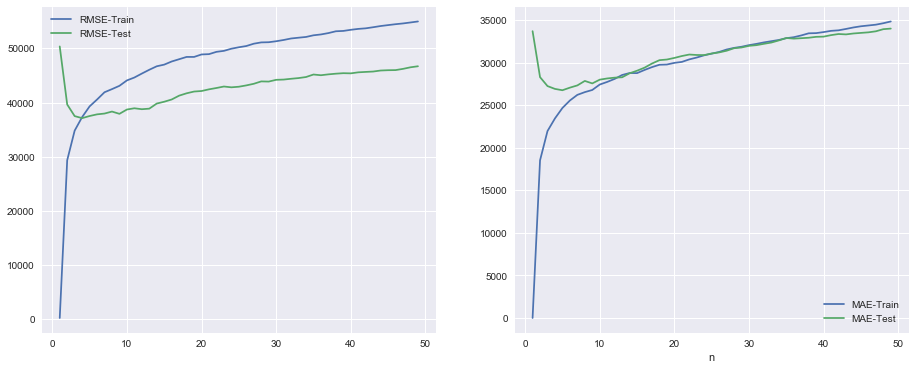

1 50354.819272428176 33702.6301369863
2 39644.90611530398 28302.470890410958
3 37501.66463249015 27252.979452054795
4 37125.49005863424 26920.438356164384
5 37517.8764700772 26764.885616438354
6 37824.66107393769 27069.303652968036
7 37972.57543138598 27331.770547945205
8 38340.442510243156 27857.73587328767
9 37920.94874954778 27566.877092846273
10 38716.00466490765 28007.371232876714
11 38947.40662425832 28149.33405977584
12 38774.44397564225 28243.578481735156
13 38876.219527824906 28286.331928345626
14 39819.17696581756 28755.160225048923
15 40153.96200235356 29059.223744292234
16 40567.78106655785 29414.82234589041
17 41277.184313544254 29902.74838839645
18 41710.87900365208 30297.011225266364
19 42034.4629973469 30373.190879596255
20 42131.729286755464 30560.65856164383
21 42442.763271793985 30783.110567514675
22 42689.90513179942 30959.414694894145
23 42962.97933632188 30905.691185229305
24 42814.32463743828 30893.586044520547
25 42923.078544877026 31081.523424657535
26 43168.22

In [21]:
#train_data_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for n in range(1,count):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    rmse_train.append(mean_squared_error(y_train, y_pred, squared=False))
    mae_train.append(mean_absolute_error(y_train, y_pred))
    y_pred = knn.predict(X_test)
    rmse_test.append(mean_squared_error(y_test, y_pred, squared=False))
    mae_test.append(mean_absolute_error(y_test, y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])
    
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

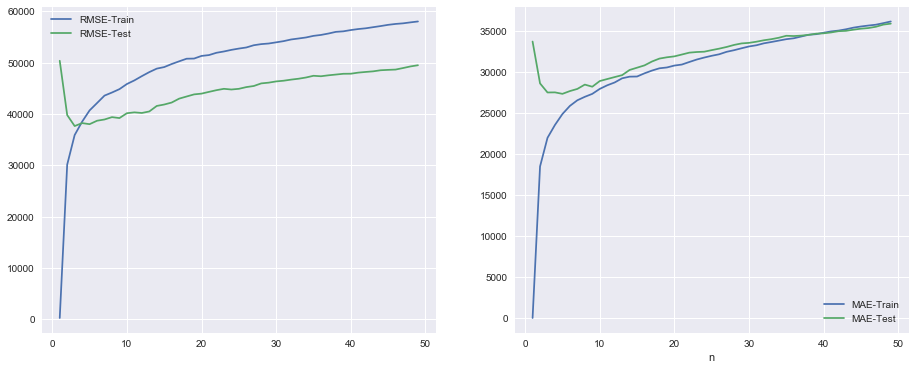

1 50354.81927242812 33702.63013698628
2 39779.0553041648 28601.301077167973
3 37640.77487149328 27495.818061790396
4 38214.587921907056 27508.252936329533
5 38005.769356347635 27329.701737475843
6 38676.21185598403 27666.666528119775
7 38917.88988585545 27929.326908112733
8 39376.62390995179 28456.43180152774
9 39193.051855850616 28198.10407064766
10 40138.838700588276 28888.12994081694
11 40306.51072819974 29133.38713458456
12 40187.185458427404 29374.166732832207
13 40480.75798595591 29609.30010704648
14 41555.8067145952 30239.90569914224
15 41832.46458834454 30517.552714537913
16 42219.179162077184 30799.86087430516
17 42978.1156215503 31271.425123093664
18 43396.281884512995 31628.644466693142
19 43806.93198366099 31784.79082512016
20 43957.072046254674 31897.38640474938
21 44299.47292504424 32120.904142254694
22 44628.689617189484 32350.881363026838
23 44894.002682272934 32427.81208230108
24 44758.14763842203 32465.741714473694
25 44891.62930931496 32657.5736274063
26 45228.146394

In [22]:
#train_data_log_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for n in range(1,count):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_log, y_train_log)
    y_pred = knn.predict(X_train_log)
    rmse_train.append(mean_squared_error(np.e**y_train_log, np.e**y_pred, squared=False))
    mae_train.append(mean_absolute_error(np.e**y_train_log,np.e**y_pred))
    y_pred = knn.predict(X_test_log)
    rmse_test.append(mean_squared_error(np.e**y_test_log, np.e**y_pred, squared=False))
    mae_test.append(mean_absolute_error(np.e**y_test_log, np.e**y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

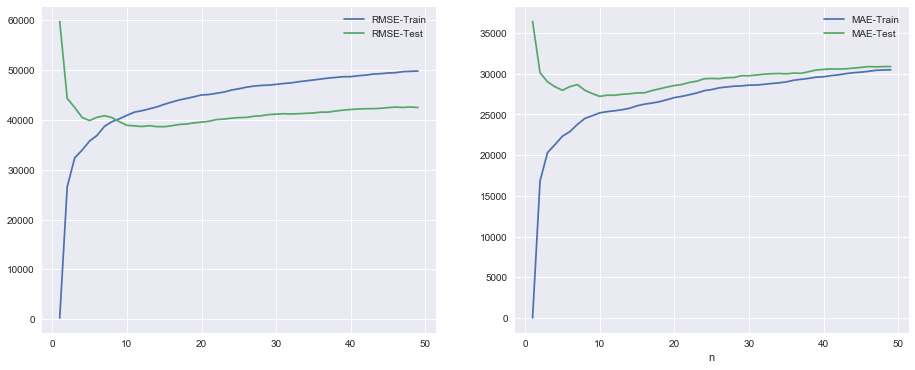

1 59721.397332381566 36416.33904109589
2 44293.20725901704 30114.27568493151
3 42475.3660682971 29007.640410958906
4 40465.55879536243 28402.283390410958
5 39851.22328097001 27969.932191780823
6 40505.551739890536 28415.765410958906
7 40809.83125082467 28669.311643835616
8 40447.63120637637 27971.665667808218
9 39609.83551779675 27566.975646879757
10 38886.47889433051 27215.30376712329
11 38784.522753195495 27367.05603985056
12 38651.05988134562 27354.351312785388
13 38816.344596006966 27476.60142255005
14 38633.16737861205 27533.000733855188
15 38613.51412433256 27648.166438356162
16 38808.00044122484 27655.916738013697
17 39058.851943260735 27933.829572925057
18 39152.95593622871 28143.230974124814
19 39378.55134263744 28357.39599855804
20 39531.79760953008 28551.646746575345
21 39706.58188982122 28671.605022831056
22 40041.82055538511 28926.3402864259
23 40143.03255809228 29081.272781417512
24 40313.93100388638 29385.12243150685
25 40436.6102714012 29417.66945205479
26 40476.9201228

In [23]:
#train_data_normal_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for n in range(1,count):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_normal, y_train_normal)
    y_pred = knn.predict(X_train_normal)
    rmse_train.append(mean_squared_error(y_train_normal, y_pred, squared=False))
    mae_train.append(mean_absolute_error(y_train_normal,y_pred))
    y_pred = knn.predict(X_test_normal)
    rmse_test.append(mean_squared_error(y_test_normal, y_pred, squared=False))
    mae_test.append(mean_absolute_error(y_test_normal, y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

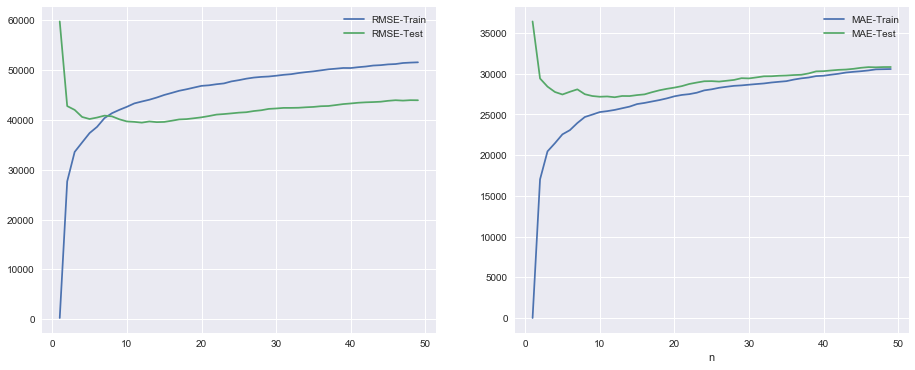

1 59721.397332381544 36416.33904109587
2 42750.59582616092 29413.90239747684
3 41985.18844460471 28417.628641694388
4 40566.47419898553 27756.285968418622
5 40156.17269359961 27450.767767359164
6 40449.23759323066 27782.534865901594
7 40834.088920971524 28082.10083531099
8 40687.29025472143 27485.564735085405
9 40093.56129960868 27264.088621782044
10 39670.10673944533 27173.255555623757
11 39581.63323827083 27208.317032760384
12 39428.92525040039 27112.44286851841
13 39665.42063151223 27265.820637886325
14 39530.21729891446 27257.477506425035
15 39571.431934925124 27377.171279470087
16 39808.299690341395 27465.87013257975
17 40072.18072542003 27729.902800354386
18 40140.02045453014 27967.037847331645
19 40310.470501330296 28148.53112183197
20 40495.901764422815 28294.832912257323
21 40753.53120382599 28478.241794949947
22 41041.50049766063 28743.066035374457
23 41152.002868375304 28916.870357912772
24 41287.23102693346 29074.5741662706
25 41433.09586564254 29090.961588621976
26 41518.9

In [24]:
#train_data_log_normal_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for n in range(1,count):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_log_normal, y_train_log_normal)
    y_pred = knn.predict(X_train_log_normal)
    rmse_train.append(mean_squared_error(np.e**y_train_log_normal, np.e**y_pred, squared=False))
    mae_train.append(mean_absolute_error(np.e**y_train_log_normal, np.e**y_pred))
    y_pred = knn.predict(X_test_log_normal)
    rmse_test.append(mean_squared_error(np.e**y_test_log_normal, np.e**y_pred, squared=False))
    mae_test.append(mean_absolute_error(np.e**y_test_log_normal, np.e**y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()


for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

<p dir="rtl" style="text-align: center;"><strong>Decision Tree</strong></p>

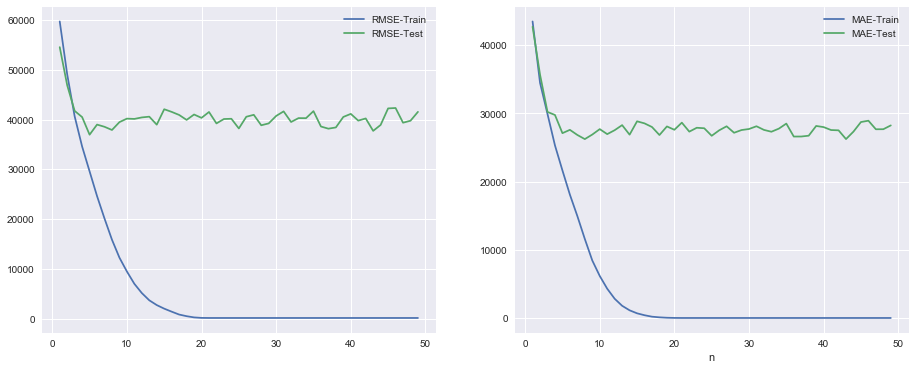

1 54529.870726898 42720.72373681009
2 46878.60018312433 35685.31735669538
3 41736.93187306416 30221.631693852796
4 40496.409388052074 29776.85444568497
5 36963.729696819595 27109.950563434737
6 38991.152264880766 27596.483489690618
7 38547.84067194522 26845.316750469276
8 37907.01226049995 26238.40637883962
9 39482.9941608295 26905.29900354599
10 40185.62428327736 27702.109529135767
11 40128.356221246824 26967.838856655264
12 40427.711836579714 27545.670929292493
13 40581.15212364056 28288.45189900382
14 38972.051611269104 26886.86742796377
15 42071.86179682832 28847.793372879973
16 41539.64464520996 28544.55221707041
17 40925.754271519254 28012.8142530985
18 39931.41703965445 26836.298515981733
19 41014.28898714481 28095.625856164384
20 40338.715917110254 27607.195205479453
21 41522.067591197156 28650.931506849316
22 39225.26909129173 27331.811643835616
23 40106.54758312751 27902.25
24 40158.687229966155 27830.171232876713
25 38210.882678972026 26724.16780821918
26 40563.57194341025 2

In [25]:
#train_data_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for d in range(1,count):
    knn = DecisionTreeRegressor(max_depth=d)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    rmse_train.append(mean_squared_error(y_train, y_pred, squared=False))
    mae_train.append(mean_absolute_error(y_train, y_pred))
    y_pred = knn.predict(X_test)
    rmse_test.append(mean_squared_error(y_test, y_pred, squared=False))
    mae_test.append(mean_absolute_error(y_test, y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

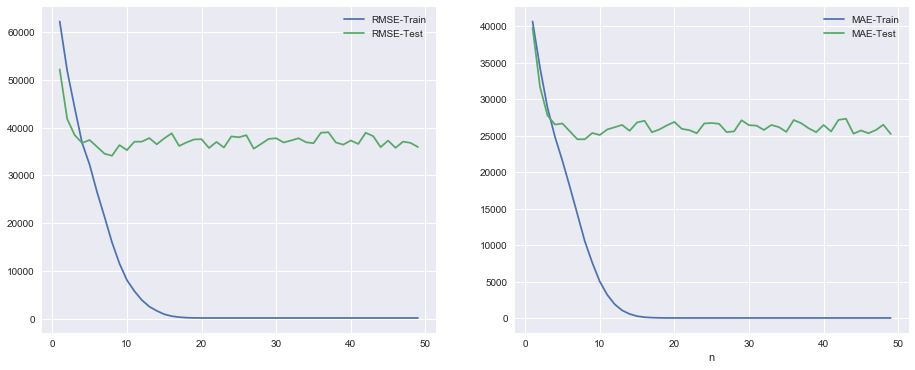

1 52144.25904772685 39805.776650797015
2 41787.87653253976 31682.172760360867
3 38429.62035551024 27789.631396655343
4 36770.43515552325 26537.042670612886
5 37395.49243745276 26687.354424492667
6 35974.58921328695 25600.74044200408
7 34532.26052559679 24526.673519623695
8 34099.15842858963 24520.319203332452
9 36325.05956782869 25380.843311167802
10 35280.94716771967 25104.263434144243
11 37037.00936617763 25863.094157830932
12 37052.11832267007 26171.060430487498
13 37797.376130100856 26484.552940070036
14 36495.788697072654 25682.09207168372
15 37733.53141753215 26826.396765348993
16 38787.15640067367 27060.911395953375
17 36148.53184803674 25482.885810098356
18 36898.170319576566 25873.41744537692
19 37511.09733693368 26423.198513682702
20 37570.335785633666 26900.942890197006
21 35727.43971165666 25945.11754773126
22 36990.40654769344 25777.24429939192
23 35826.18452927137 25348.946314854533
24 38145.01357589057 26684.01140929993
25 37961.588475998535 26752.727150764258
26 38400.1

In [26]:
#train_data_log_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for d in range(1,count):
    knn = DecisionTreeRegressor(max_depth=d)
    knn.fit(X_train_log, y_train_log)
    y_pred = knn.predict(X_train_log)
    rmse_train.append(mean_squared_error(np.e**y_train_log, np.e**y_pred, squared=False))
    mae_train.append(mean_absolute_error(np.e**y_train_log, np.e**y_pred))
    y_pred = knn.predict(X_test_log)
    rmse_test.append(mean_squared_error(np.e**y_test_log, np.e**y_pred, squared=False))
    mae_test.append(mean_absolute_error(np.e**y_test_log, np.e**y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

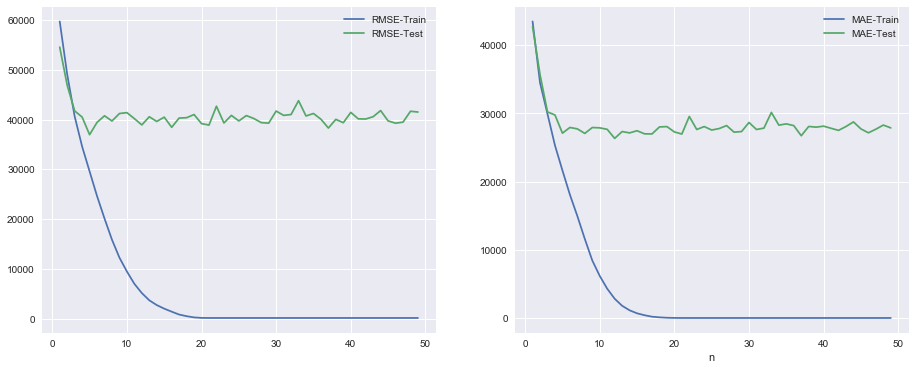

1 54529.870726898 42720.72373681009
2 46878.60018312433 35685.31735669538
3 41736.93187306416 30221.631693852796
4 40496.409388052074 29776.85444568497
5 36963.729696819595 27109.950563434737
6 39438.641722828426 27941.46475152378
7 40756.06818841981 27739.72457010398
8 39713.24108593723 27073.948942440402
9 41211.22866077213 27934.106821821704
10 41389.048260536685 27888.42249359096
11 40189.00650936987 27669.76834909304
12 38925.366833829954 26344.425278063965
13 40560.6515292366 27343.5554378166
14 39614.87538647411 27149.739471085275
15 40485.274802510365 27464.892606409005
16 38446.9964450431 27010.635479056713
17 40300.99351152331 26992.669112850617
18 40370.1073710937 28020.14668949772
19 41004.428248554956 28073.40896118722
20 39184.055763419594 27292.011415525118
21 38890.481250478704 26980.10616438356
22 42670.38342388191 29558.35616438356
23 39312.46518316292 27648.448630136987
24 40835.32685510199 28076.178082191782
25 39724.60220272047 27568.116438356163
26 40797.934037851

In [27]:
#train_data_normal_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for d in range(1,count):
    knn = DecisionTreeRegressor(max_depth=d)
    knn.fit(X_train_normal, y_train_normal)
    y_pred = knn.predict(X_train_normal)
    rmse_train.append(mean_squared_error(y_train_normal, y_pred, squared=False))
    mae_train.append(mean_absolute_error(y_train_normal, y_pred))
    y_pred = knn.predict(X_test_normal)
    rmse_test.append(mean_squared_error(y_test_normal, y_pred, squared=False))
    mae_test.append(mean_absolute_error(y_test_normal, y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

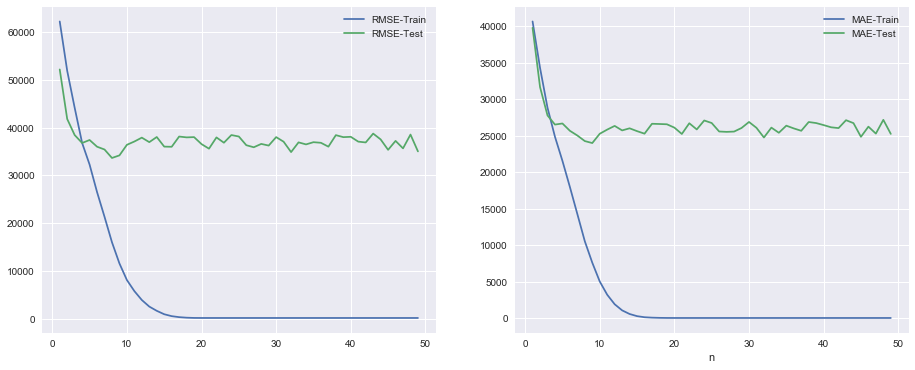

1 52144.25904772685 39805.776650797015
2 41787.876532539696 31682.17276036088
3 38429.62035551041 27789.631396655404
4 36770.43515552318 26537.04267061285
5 37395.49243745273 26687.35442449265
6 35992.883218770236 25683.09061535291
7 35406.2988344938 25036.788674222837
8 33637.27138473206 24273.039941485476
9 34178.08195880317 24001.158698951403
10 36386.88318472761 25275.620513366524
11 37077.79283769158 25846.812447507393
12 37889.16263110478 26353.707814866786
13 36946.34352722629 25736.703783955403
14 38018.51876892199 26023.929836085386
15 36012.136565895016 25635.34419777456
16 35974.662467225506 25288.852409799747
17 38117.37095412772 26646.623132895744
18 37943.342592081695 26615.015111091638
19 37997.086722176115 26576.71978859442
20 36536.04909060955 26119.08330115591
21 35581.091609381 25247.616136795783
22 37934.72114552324 26717.261409299943
23 36827.39663597276 25869.508000211856
24 38431.84168452832 27098.27024638483
25 38123.3802951169 26751.30935450541
26 36306.4617200

In [28]:
#train_data_log_normal_minimized_encoded 
rmse_train = list()
mae_train = list()
rmse_test = list()
mae_test = list()
count = 50
for d in range(1,count):
    knn = DecisionTreeRegressor(max_depth=d)
    knn.fit(X_train_log_normal, y_train_log_normal)
    y_pred = knn.predict(X_train_log_normal)
    rmse_train.append(mean_squared_error(np.e**y_train_log_normal, np.e**y_pred, squared=False))
    mae_train.append(mean_absolute_error(np.e**y_train_log_normal, np.e**y_pred))
    y_pred = knn.predict(X_test_log_normal)
    rmse_test.append(mean_squared_error(np.e**y_test_log_normal, np.e**y_pred, squared=False))
    mae_test.append(mean_absolute_error(np.e**y_test_log_normal, np.e**y_pred))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
#rmse
axes[0].plot(range(1,count), rmse_train, label = 'RMSE-Train')
axes[0].plot(range(1,count), rmse_test, label = 'RMSE-Test')
axes[0].legend()
#mae
axes[1].plot(range(1,count), mae_train, label = 'MAE-Train')
axes[1].plot(range(1,count), mae_test, label = 'MAE-Test')
plt.xlabel('n')
axes[1].legend()
plt.show()

for i in range(1,count):
    print(i, rmse_test[i-1], mae_test[i-1])

#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

<p dir="rtl" style="text-align: center;"><strong>linear regression</strong></p>

In [29]:
#train_data_minimized_encoded 
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = regressor.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
# df

# coeff_df = pd.DataFrame(regressor.coef_, train_data_minimized_encoded.drop(columns='SalePrice').columns, columns=['Coefficient'])
# coeff_df

RMSE_Train: 27710.226831694144 MAE_Train: 17333.85020732053
RMSE_Test: 26626.84243737228 MAE_Test: 19715.2080770117


In [30]:
#train_data_normal_minimized_encoded 
regressor = LinearRegression()
regressor.fit(X_train_normal, y_train_normal)
y_pred = regressor.predict(X_train_normal)
rmse_train = mean_squared_error(y_train_normal, y_pred, squared=False)
mae_train = mean_absolute_error(y_train_normal, y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = regressor.predict(X_test_normal)
rmse_test = mean_squared_error(y_test_normal, y_pred, squared=False)
mae_test = mean_absolute_error(y_test_normal, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

# coeff_df = pd.DataFrame(regressor.coef_, train_data_minimized_encoded.drop(columns='SalePrice').columns, columns=['Coefficient'])
# coeff_df

RMSE_Train: 27711.447883491866 MAE_Train: 17333.617823479006
RMSE_Test: 109720692696411.77 MAE_Test: 6420917891895.911


In [31]:
#train_data_log_minimized_encoded 
regressor = LinearRegression()
regressor.fit(X_train_log, y_train_log)
y_pred = regressor.predict(X_train_log)
rmse_train = mean_squared_error(np.e**y_train_log, np.e**y_pred, squared=False)
mae_train = mean_absolute_error(np.e**y_train_log, np.e**y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = regressor.predict(X_test_log)
rmse_test = mean_squared_error(np.e**y_test_log, np.e**y_pred, squared=False)
mae_test = mean_absolute_error(np.e**y_test_log, np.e**y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

# coeff_df = pd.DataFrame(regressor.coef_, train_data_minimized_encoded.drop(columns='SalePrice').columns, columns=['Coefficient'])
# coeff_df

RMSE_Train: 24928.2425407001 MAE_Train: 14160.321861459703
RMSE_Test: 23625.932167163803 MAE_Test: 16702.798790465094


In [32]:
#train_data_log_normal_minimized_encoded 
regressor = LinearRegression()
regressor.fit(X_train_log_normal, y_train_log_normal)
y_pred = regressor.predict(X_train_log_normal)
rmse_train = mean_squared_error(np.e**y_train_log_normal, np.e**y_pred, squared=False)
mae_train = mean_absolute_error(np.e**y_train_log_normal, np.e**y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = regressor.predict(X_test_log_normal)
rmse_test = mean_squared_error(np.e**y_test_log_normal, y_pred, squared=False)
mae_test = mean_absolute_error(np.e**y_test_log_normal, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

# coeff_df = pd.DataFrame(regressor.coef_, train_data_minimized_encoded.drop(columns='SalePrice').columns, columns=['Coefficient'])
# coeff_df

RMSE_Train: 24927.76278240684 MAE_Train: 14162.968220745282
RMSE_Test: 534119130.8969305 MAE_Test: 31437786.096142493


<p dir="rtl" style="text-align: right;">مشاهده میکنیم که نرمالایز کردن و لگاریتم گرفتن تا حدی باعث کاهش خطا میشود همچنین به نظر میرسد عملکرد Decision Tree اندکی از KNN بیشتر است البته احتمال overfit شدن آن روی داده ها نیز بیشتر است اگر هایپرپارامتر آن به درستی تعیین نشود.</p>

<p dir="rtl" style="text-align: right;">در مورد linear regression میبینیم که وقتی داده ها نرمالایز شده اند درست عمل نمیکند که احتمالا علت آن این است که وقتی از one hot encoding استفاده میکنیم بعد از این که نرمالایز کردیم باعث میشود که این داده های دسته ای تاثیر و وزن بیشتری در ساخت خروجی داشته باشند چون حداکثر مقدار را دارند (1) و همین موضوع باعث ایجاد خطای شدید در این مدل شده است لذا به نظر بهتر است بعد از انکئد کردن اقدام به نرمالایز کردن داده ها بکنیم تا وزن الکی به داده های دسته ای نامی داده نشود.</p>
<p dir="rtl" style="text-align: right;">دو مدل دیگر عملکرد نزدیک به مطلوب ما دارند و نیز مدل Random Forest فاز بعدی نیز عملکرد خوبی داشته و شرطهایی که برای MAE و RMSE گفته شده بود را ارضا میکنند.</p>

<p style="text-align: right;" dir="rtl"><strong>3.</strong></p>

<p dir="rtl" style="text-align: right;">overfitting وقتی رخ میدهد که مدل ما به دقت تقریبا 100درصدی یا معادلا خطای صفر روی داده ای که با آن آموزش دیده برسد، یعنی انگار که داده آموزش را حفظ کرده است (با تمام نویز ها و ...) به جای اینکه trend کلی را در آن شناسایی کند وبه همین دلیل مدل در مواجهه با داده جدید عملکرد خیلی بدی دارد نسبت به داده ای که قبلا دیده است؛ این حالت معمولا در مدل های پیجیده تر رخ میدهد البته Decision Tree ها هم معمولا دچار این مشکل هستند.</p>
<p dir="rtl" style="text-align: right;">در طرف مقابل <span>Underfitting&nbsp; قرار دارد که برعکس overfitting&nbsp; در این حالت مدل حتی روی داده ای که با آن آموزش دیده هم عملکرد مطلوبی ندارد و حتی داده هایی که قبلا دیده را هم نمیتواند به درستی تخمین بزند و این حالت معمولا در مدلهای بیش از حد ساده رخ میدهد...</span></p>

<p dir="rtl" style="text-align: right;">در مدل های بالا میبینیم که Decision Tree وقتی حداکثر عمق درختشان از حدود 20-25 بیشتر میشود خطای داده train آنها صفر میشود که این امر نشان دهنده overfitting است و یعنی درخت تصمیم ما کاملا بر داده آموزش منطبق شده و آنرا حفظ کرده است.</p>
<p dir="rtl" style="text-align: right;">KNN به نظر میرسد که وقتی فقط یک همسایه را در نظر میگیریم دچار overfitting است اما با افزایش تعداد همسایه ها وضع بهتر میشود و البته وقتی تعداد همسایه ها از یک حدی بیشتر میشود هم خطا برای داده train هم زیاد میشود که در این حالت underfitting رخ داده است پس تعداد همسایه های آن نه خیلی کم باید باشد و نه خیلی زیاد.</p>
<p dir="rtl" style="text-align: right;"></p>

<p style="text-align: right;" dir="rtl"><strong>4.</strong></p>

<p dir="rtl" style="text-align: right;">بخشی ازتاثیر پیش پردازشهایی که انجام داده ایم را در این فاز و بخشی را در فاز بعدی خواهیم دید اما به طور کلی دیده شد که نرمالایز کردن داده ها و همچنین لگاریتم&nbsp; گرفتن از ستون تارگت تا حدی میتواند به بهتر شدن مدل ما کمک کند علی الخصوص در روشهای گروهی یادگیری که در فاز بعدی بررسی میکنیم.</p>
<p dir="rtl" style="text-align: right;">همچنین بخشی از پیش پردازشها هم که ضروری هستند (مثل encoding) که در صورتی که انجام نگیرند اصلا مدل قابلیت یادگیری از داده ها را ندارد و لذا تاثیر آنها کاملا واضح و مشخص می باشد.</p>

<p style="text-align: right;" dir="rtl"><strong>فاز سوم: Ensemble Methods</strong></p>


<p style="text-align: right;" dir="rtl"><strong>1.</strong></p>

<p dir="rtl" style="text-align: right;">مدل جنگل تصادفی را با استفاده از کتابخانه مذکور پیاده کرده و همچنین برای تیون کردن هایپرپارامترهای آن از روش Grid Search با کمک همان کتابخانه کمک میگیریم و n_estimators (تعداد درختای موجود در جنگل) ، حداکثر عمق درخت (max_depth) را با توجه به نتایجی که از فاز قبل هم بدست آمده بود بهینه میکنیم: (در ابتدا پارامتر min_samples_leaf را هم سعی کردیم بهینه کنیم اما به نظر مقدار دیفالت آن نتیجه بهتری دارد لذا آنرا در نظر نگرفتیم و لذا سرعت گرید سرچ هم بیشتر شد)</p>

<p dir="rtl" style="text-align: center;"><strong>Random Forest</strong></p>

In [33]:
#train_data_minimized_encoded 
rfregressor = RandomForestRegressor(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 25, num = 5)]
min_samples_leaf = [1, 3, 5, 10, 20, 50]
param_grid = { 
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    #'min_samples_leaf' : min_samples_leaf
}
CV_rfc = GridSearchCV(estimator=rfregressor, param_grid=param_grid, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

y_pred = CV_rfc.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = CV_rfc.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

{'max_depth': 25, 'n_estimators': 28}
RMSE_Train: 12352.968965731196 MAE_Train: 7122.552791039295
RMSE_Test: 24812.102861511525 MAE_Test: 17350.480878995433


In [34]:
#train_data_normal_minimized_encoded 
rfregressor = RandomForestRegressor(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 25, num = 5)]
min_samples_leaf = [1, 3, 5, 10, 20, 50]
param_grid = { 
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    #'min_samples_leaf' : min_samples_leaf
}
CV_rfc = GridSearchCV(estimator=rfregressor, param_grid=param_grid, n_jobs=-1)
CV_rfc.fit(X_train_normal, y_train_normal)
print(CV_rfc.best_params_)

y_pred = CV_rfc.predict(X_train_normal)
rmse_train = mean_squared_error(y_train_normal, y_pred, squared=False)
mae_train = mean_absolute_error(y_train_normal, y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = CV_rfc.predict(X_test_normal)
rmse_test = mean_squared_error(y_test_normal, y_pred, squared=False)
mae_test = mean_absolute_error(y_test_normal, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

{'max_depth': 25, 'n_estimators': 28}
RMSE_Train: 12352.011899014906 MAE_Train: 7120.472181417554
RMSE_Test: 24796.921887091383 MAE_Test: 17362.453604044356


In [35]:
#train_data_log_minimized_encoded 
rfregressor = RandomForestRegressor(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 25, num = 5)]
min_samples_leaf = [1, 3, 5, 10, 20, 50]
param_grid = { 
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    #'min_samples_leaf' : min_samples_leaf
}
CV_rfc = GridSearchCV(estimator=rfregressor, param_grid=param_grid, n_jobs=-1)
CV_rfc.fit(X_train_log, y_train_log)
print(CV_rfc.best_params_)

y_pred = CV_rfc.predict(X_train_log)
rmse_train = mean_squared_error(np.e**y_train_log, np.e**y_pred, squared=False)
mae_train = mean_absolute_error(np.e**y_train_log, np.e**y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = CV_rfc.predict(X_test_log)
rmse_test = mean_squared_error(np.e**y_test_log, np.e**y_pred, squared=False)
mae_test = mean_absolute_error(np.e**y_test_log, np.e**y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

{'max_depth': 15, 'n_estimators': 76}
RMSE_Train: 12654.167968490903 MAE_Train: 6947.225255991377
RMSE_Test: 23028.100624920466 MAE_Test: 16455.03300043197


In [36]:
#train_data_log_normal_minimized_encoded 
rfregressor = RandomForestRegressor(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 25, num = 5)]
min_samples_leaf = [1, 3, 5, 10, 20, 50]
param_grid = { 
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    #'min_samples_leaf' : min_samples_leaf
}
CV_rfc = GridSearchCV(estimator=rfregressor, param_grid=param_grid, n_jobs=-1)
CV_rfc.fit(X_train_log_normal, y_train_log_normal)
print(CV_rfc.best_params_)

y_pred = CV_rfc.predict(X_train_log_normal)
rmse_train = mean_squared_error(np.e**y_train_log_normal, np.e**y_pred, squared=False)
mae_train = mean_absolute_error(np.e**y_train_log_normal, np.e**y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = CV_rfc.predict(X_test_log_normal)
rmse_test = mean_squared_error(np.e**y_test_log_normal, np.e**y_pred, squared=False)
mae_test = mean_absolute_error(np.e**y_test_log_normal, np.e**y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

{'max_depth': 15, 'n_estimators': 76}
RMSE_Train: 12666.733570661647 MAE_Train: 6951.081346471955
RMSE_Test: 22997.790276414926 MAE_Test: 16440.553328449856


<p dir="rtl" style="text-align: right;">مدل جنگل تصادفی را با استفاده از کتابخانه مذکور پیاده کرده و همچنین برای تیون کردن هایپرپارامترهای آن از روش Grid Search با کمک همان کتابخانه کمک میگیریم و n_estimators (تعداد درختای موجود در جنگل) ، حداکثر عمق درخت (max_depth) را با توجه به نتایجی که از فاز قبل هم بدست آمده بود بهینه میکنیم؛ (در ابتدا پارامتر min_samples_leaf را هم سعی کردیم بهینه کنیم اما به نظر مقدار دیفالت آن نتیجه بهتری دارد لذا آنرا در نظر نگرفتیم و لذا سرعت گرید سرچ هم بیشتر شد)</p>
<p dir="rtl" style="text-align: right;">در این بخش اثر نرمالایز کردن و لگاریتم گرفتن بیشتر مشخص است و مشاهده میشود با این کار دقت مدل ما افزایش می یابد؛ بهترین عملکرد در میان مدلهایی که ما بررسی کردیم مربوط به مدل Random Forest با هایپرپارامترهای زیر بود:</p>
<pre>{'max_depth': 15, 'n_estimators': 76}</pre>
<p dir="rtl" style="text-align: right;">که روی داده هایی که هم نرمالایز شده بودند و هم ستون هدف آنها لگاریتمی بود به مقادیر خطای زیر رسیدیم:</p>
<pre>RMSE_Train: 12666.733570661647 MAE_Train: 6951.081346471955
RMSE_Test: 22997.790276414926 MAE_Test: 16440.553328449856</pre>

<p style="text-align: right;" dir="rtl"><strong>2.</strong></p>

<p dir="rtl" style="text-align: right;">مدل گروهی دیگر که خواسته شده بررسی کنیم مدل Voting Regression است که براساس مدلهای فاز قبل و با میانگین گیری سعی میکند خطای مدلهارا کمتر کرده و نتیجه مطلوب تری به ما بدهد؛</p>
<p dir="rtl" style="text-align: right;">نتایج این مدل در ادامه آمده است:</p>

<p dir="rtl" style="text-align: center;"><strong>Voting Regression</strong></p>

In [37]:
#train_data_minimized_encoded 
# Train classifiers
reg1 = KNeighborsRegressor(n_neighbors=3)
reg2 = DecisionTreeRegressor(max_depth=8)
reg3 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([('knn', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train, y_train)

y_pred = ereg.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = ereg.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)
pred4 = ereg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'KNN Predicted': pred1, 'DecisionTree Predicted': pred2, 'LinearRegression Predicted': pred3, 'VotingRegression Predicted': pred4})
df

RMSE_Train: 19614.103591431372 MAE_Train: 12292.668051979099
RMSE_Test: 24329.273789912833 MAE_Test: 17468.724090110944


,Actual,KNN Predicted,DecisionTree Predicted,LinearRegression Predicted,VotingRegression Predicted
Id,,,,,
1322,72500,93466.666667,102808.363636,63399.986526,86558.338943
837,153500,181066.666667,126101.595238,128197.723357,145121.995087
414,115000,118500.000000,113935.000000,104384.986497,112273.328832
523,159000,128000.000000,170440.587302,186195.103767,161545.230356
1036,84000,93716.666667,102808.363636,64714.582087,87079.870797
615,75500,83500.000000,81937.500000,82494.260723,82643.920241
219,311500,211166.666667,335000.000000,258739.350821,268302.005829
1032,197000,242333.333333,225500.000000,283307.769327,250380.367553
1290,281000,186466.666667,242493.918919,327839.545378,252266.710321


In [38]:
#train_data_normal_minimized_encoded 
reg1 = KNeighborsRegressor(n_neighbors=10)
reg2 = DecisionTreeRegressor(max_depth=12)
reg3 = LinearRegression()

reg1.fit(X_train_normal, y_train_normal)
reg2.fit(X_train_normal, y_train_normal)
reg3.fit(X_train_normal, y_train_normal)

ereg = VotingRegressor([('knn', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train_normal, y_train_normal)

y_pred = ereg.predict(X_train_normal)
rmse_train = mean_squared_error(y_train_normal, y_pred, squared=False)
mae_train = mean_absolute_error(y_train_normal, y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = ereg.predict(X_test_normal)
rmse_test = mean_squared_error(y_test_normal, y_pred, squared=False)
mae_test = mean_absolute_error(y_test_normal, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

pred1 = reg1.predict(X_test_normal)
pred2 = reg2.predict(X_test_normal)
pred3 = reg3.predict(X_test_normal)
pred4 = ereg.predict(X_test_normal)

df = pd.DataFrame({'Actual': y_test_normal, 'KNN Predicted': pred1, 'DecisionTree Predicted': pred2, 'LinearRegression Predicted': pred3, 'VotingRegression Predicted': pred4})
df

RMSE_Train: 20612.77975146522 MAE_Train: 12051.018356287259
RMSE_Test: 36573564233361.66 MAE_Test: 2140305975542.7698


,Actual,KNN Predicted,DecisionTree Predicted,LinearRegression Predicted,VotingRegression Predicted
Id,,,,,
1322,72500,129655.5,106977.777778,6.331200e+04,9.998176e+04
837,153500,125167.5,107400.000000,1.281280e+05,1.202318e+05
414,115000,112250.4,120000.000000,1.043040e+05,1.121848e+05
523,159000,117780.0,176648.976190,1.861920e+05,1.602070e+05
1036,84000,113180.0,84900.000000,6.465600e+04,8.677867e+04
615,75500,96600.0,81500.000000,8.246400e+04,8.685467e+04
219,311500,179850.0,289000.000000,2.586400e+05,2.578300e+05
1032,197000,189945.0,225000.000000,2.832000e+05,2.330483e+05
1290,281000,343921.6,288500.000000,3.278720e+05,3.156812e+05


In [39]:
#train_data_log_minimized_encoded 
reg1 = KNeighborsRegressor(n_neighbors=5)
reg2 = DecisionTreeRegressor(max_depth=8)
reg3 = LinearRegression()

reg1.fit(X_train_log, y_train_log)
reg2.fit(X_train_log, y_train_log)
reg3.fit(X_train_log, y_train_log)

ereg = VotingRegressor([('knn', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train_log, y_train_log)

y_pred = ereg.predict(X_train_log)
rmse_train = mean_squared_error(np.e**y_train_log, np.e**y_pred, squared=False)
mae_train = mean_absolute_error(np.e**y_train_log, np.e**y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = ereg.predict(X_test_log)
rmse_test = mean_squared_error(np.e**y_test_log, np.e**y_pred, squared=False)
mae_test = mean_absolute_error(np.e**y_test_log, np.e**y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

pred1 = reg1.predict(X_test_log)
pred2 = reg2.predict(X_test_log)
pred3 = reg3.predict(X_test_log)
pred4 = ereg.predict(X_test_log)

df = pd.DataFrame({'Actual': np.e**y_test_log, 'KNN Predicted': np.e**pred1, 'DecisionTree Predicted': np.e**pred2, 'LinearRegression Predicted': np.e**pred3, 'VotingRegression Predicted': np.e**pred4})
df

RMSE_Train: 21509.558422601567 MAE_Train: 12553.16625114598
RMSE_Test: 24959.786899848834 MAE_Test: 17741.59658135885


,Actual,KNN Predicted,DecisionTree Predicted,LinearRegression Predicted,VotingRegression Predicted
Id,,,,,
1322,72500.0,96961.816678,111853.177084,83061.588668,96579.088107
837,153500.0,185710.573473,132984.961556,128025.534877,146772.690045
414,115000.0,119594.793520,115193.672095,107158.468901,113864.706735
523,159000.0,150509.214853,174777.661870,169964.294782,164741.204632
1036,84000.0,88375.003408,93687.032448,76124.807455,85738.992883
615,75500.0,84410.079962,85246.700816,80534.947965,83371.719378
219,311500.0,206062.728414,202566.169770,266291.240346,223172.706808
1032,197000.0,262975.549169,261478.158785,263495.831659,262648.452352
1290,281000.0,204363.743086,261789.107834,282752.073002,247316.868998


In [40]:
#train_data_log_normal_minimized_encoded 
reg1 = KNeighborsRegressor(n_neighbors=10)
reg2 = DecisionTreeRegressor(max_depth=8)
reg3 = LinearRegression()

reg1.fit(X_train_log_normal, y_train_log_normal)
reg2.fit(X_train_log_normal, y_train_log_normal)
reg3.fit(X_train_log_normal, y_train_log_normal)

ereg = VotingRegressor([('knn', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train_log_normal, y_train_log_normal)

y_pred = ereg.predict(X_train_log_normal)
rmse_train = mean_squared_error(np.e**y_train_log_normal, np.e**y_pred, squared=False)
mae_train = mean_absolute_error(np.e**y_train_log_normal, np.e**y_pred)
print('RMSE_Train:',rmse_train,'MAE_Train:',mae_train)
y_pred = ereg.predict(X_test_log_normal)
rmse_test = mean_squared_error(np.e**y_test_log_normal, y_pred, squared=False)
mae_test = mean_absolute_error(np.e**y_test_log_normal, y_pred)
print('RMSE_Test:',rmse_test,'MAE_Test:',mae_test)

pred1 = reg1.predict(X_test_log_normal)
pred2 = reg2.predict(X_test_log_normal)
pred3 = reg3.predict(X_test_log_normal)
pred4 = ereg.predict(X_test_log_normal)

df = pd.DataFrame({'Actual': np.e**y_test_log_normal, 'KNN Predicted': np.e**pred1, 'DecisionTree Predicted': np.e**pred2, 'LinearRegression Predicted': np.e**pred3, 'VotingRegression Predicted': np.e**pred4})
df

RMSE_Train: 23191.443866196074 MAE_Train: 13488.45305062239
RMSE_Test: 178037192.11802632 MAE_Test: 10599662.609038733


,Actual,KNN Predicted,DecisionTree Predicted,LinearRegression Predicted,VotingRegression Predicted
Id,,,,,
1322,72500.0,127877.129584,111853.177084,8.302053e+04,1.058950e+05
837,153500.0,124286.628090,117000.000000,1.280834e+05,1.230366e+05
414,115000.0,110371.687641,115193.672095,1.071550e+05,1.108578e+05
523,159000.0,116863.365145,174777.661870,1.699732e+05,1.514194e+05
1036,84000.0,111594.590140,93687.032448,7.610027e+04,9.266227e+04
615,75500.0,95161.552681,85246.700816,8.054980e+04,8.677631e+04
219,311500.0,177042.496149,202566.169770,2.660704e+05,2.121031e+05
1032,197000.0,187838.254658,261478.158785,2.632918e+05,2.347212e+05
1290,281000.0,328033.333292,261789.107834,2.829194e+05,2.896304e+05


<p dir="rtl" style="text-align: right;">voting regression&nbsp; هم چون از میانگین 3 مدل فاز قبل استفاده میکند از آن سه مدل قبلی عملکرد بهتری دارد ولی نسبت به Random Forest اندکی عملکردش ضعیف تر است؛ همچنین دیدیم که linear regression روی داده هایی که نرمالایز شده اند عملکرد درستی ندارد لذا در اینجا هم خروجی برای داده های نرمال شده معتبر نیست...</p>

<p style="text-align: right;" dir="rtl"><strong>3.</strong></p>

<p dir="rtl" style="text-align: right;">روش voting regression در حالت کلی عملکرد بهتری نسبت به مدلهایی تکی دارد زیرا که با میانگین گیری از خروجی هر کدام از مدلها باعث کاهش bias و variance و افزایش دقت مدل میشود و در جداول بالا خروجی مدلهای تکی و خروجی voting regression را میبینیم که دیده میشود این میانگین گیری واریانس ناشی از نویز و... موجود در دیتاست است را کاهش داده و اکثر مواقع&nbsp; نزدیک تر به مقدار واقعی است.</p>
<p dir="rtl" style="text-align: right;">نکته ای که وجود دارد این است که روشهای گروهی در مدلهایی برای مدلهایی که کمتر استیبل هستند بیشتر باعث افزایش دقت میشود تا مدلهایی که به نسبت جنرال هستند و bias و variance پایین دارند و به همین دلیل است که مثلا Random Forest (که حالت خاصی از همین voting regression است)&nbsp; مجموعه ای از مدلهای نسبتا غیر استیبل است عملکرد نسبتا خوبی دارد.</p>
<p dir="rtl" style="text-align: right;">طبق آمارها و تحقیقات روشهای گروهی در بیشتر موارد عملکرد بهتری نسبت به مدلهای تکی دارند ولی به تبع over head زمانی آنها نیز بیشتر است.</p>